# FROM STUDIO TO SCREEN
## Visualizing Anime Trends and Explaining the Unexpected
### Lan Nguyen and Faye Le

## I. Introduction

Our group wanted to know whether the top 10000 anime has a trend in why some anime has a higher scoring than others, while trying to see if those factors predict can an anime has a higher score.

Here is what we did. 

## Library ##

In [1]:
import pandas as pd
import time
import random
import numpy as np
import streamlit as st
import matplotlib 
matplotlib.use('Qt5Agg') 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Dataset ##

The dataset is scraped from the website https://myanimelist.net/topanime.php. Dataset contain the top 10000 anime ranked on the 30th of October, 2024.

In [2]:
super_df = pd.read_csv('totoro_group_data.csv')

In [3]:
super_df.describe()

,Rank,Score,Unnamed: 0
count,9844.000000,9844.000000,5996.000000
mean,5068.976534,6.915924,1230.670614
std,2854.113609,0.624616,1120.037454
min,1.000000,5.960000,0.000000
25%,2613.750000,6.410000,275.000000
50%,5075.500000,6.840000,744.500000
75%,7537.250000,7.330000,2156.250000
max,10000.000000,9.320000,3656.000000


Here we did some clean-up for the dataset.

In [4]:
super_df = super_df.drop('Unnamed: 0', axis=1)

In [5]:
super_df

,Rank,Title,URL,Score,Genres,Episodes,Premiered,Studio,Type,Source
0,1,Sousou no Frieren,https://myanimelist.net/anime/52991/Sousou_no_...,9.32,"Adventure, Drama, Fantasy, Shounen",28,Fall 2023,Madhouse,TV,Manga
1,2,One Piece Fan Letter,https://myanimelist.net/anime/60022/One_Piece_...,9.17,"Action, Adventure, Fantasy, Shounen",1,Premiered season not found,Toei Animation,TV Special,Light novel
2,3,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,9.09,"Action, Adventure, Drama, Fantasy, Military, S...",64,Spring 2009,Bones,TV,Manga
3,4,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,9.07,"Drama, Sci-Fi, Suspense, Psychological, Time T...",24,Spring 2011,White Fox,TV,Source not found
4,5,Shingeki no Kyojin Season 3 Part 2,https://myanimelist.net/anime/38524/Shingeki_n...,9.05,"Action, Drama, Suspense, Gore, Military, Survi...",10,Spring 2019,Wit Studio,TV,Manga
...,...,...,...,...,...,...,...,...,...,...
9839,9996,Garugaku. II: Lucky Stars,https://myanimelist.net/anime/50495/Garugaku_I...,5.96,"Idols (Female), Music, School",50,Premiered season not found,OLM,TV,Source not found
9840,9997,Guan Hai Ce,https://myanimelist.net/anime/38689/Guan_Hai_Ce,5.96,"Action, Fantasy, Historical, Martial Arts, Mil...",16,Premiered season not found,Tong Ming Xuan,ONA,Source not found
9841,9998,Hatara Kids Mai Ham Gumi,https://myanimelist.net/anime/3251/Hatara_Kids...,5.96,"Action, Kids",50,Premiered season not found,Toei Animation,TV,Source not found
9842,9999,Hatsukoi Monster: Mou Chotto dake Tsuzukunja,https://myanimelist.net/anime/34016/Hatsukoi_M...,5.96,"Comedy, Romance, School, Shoujo",1,Premiered season not found,Studio Deen,OVA,Manga


In [6]:
super_df['Episodes'] = pd.to_numeric(super_df['Episodes'], errors='coerce')
super_df['Episodes'] = super_df['Episodes'].astype('Int64')
super_df

,Rank,Title,URL,Score,Genres,Episodes,Premiered,Studio,Type,Source
0,1,Sousou no Frieren,https://myanimelist.net/anime/52991/Sousou_no_...,9.32,"Adventure, Drama, Fantasy, Shounen",28,Fall 2023,Madhouse,TV,Manga
1,2,One Piece Fan Letter,https://myanimelist.net/anime/60022/One_Piece_...,9.17,"Action, Adventure, Fantasy, Shounen",1,Premiered season not found,Toei Animation,TV Special,Light novel
2,3,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,9.09,"Action, Adventure, Drama, Fantasy, Military, S...",64,Spring 2009,Bones,TV,Manga
3,4,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,9.07,"Drama, Sci-Fi, Suspense, Psychological, Time T...",24,Spring 2011,White Fox,TV,Source not found
4,5,Shingeki no Kyojin Season 3 Part 2,https://myanimelist.net/anime/38524/Shingeki_n...,9.05,"Action, Drama, Suspense, Gore, Military, Survi...",10,Spring 2019,Wit Studio,TV,Manga
...,...,...,...,...,...,...,...,...,...,...
9839,9996,Garugaku. II: Lucky Stars,https://myanimelist.net/anime/50495/Garugaku_I...,5.96,"Idols (Female), Music, School",50,Premiered season not found,OLM,TV,Source not found
9840,9997,Guan Hai Ce,https://myanimelist.net/anime/38689/Guan_Hai_Ce,5.96,"Action, Fantasy, Historical, Martial Arts, Mil...",16,Premiered season not found,Tong Ming Xuan,ONA,Source not found
9841,9998,Hatara Kids Mai Ham Gumi,https://myanimelist.net/anime/3251/Hatara_Kids...,5.96,"Action, Kids",50,Premiered season not found,Toei Animation,TV,Source not found
9842,9999,Hatsukoi Monster: Mou Chotto dake Tsuzukunja,https://myanimelist.net/anime/34016/Hatsukoi_M...,5.96,"Comedy, Romance, School, Shoujo",1,Premiered season not found,Studio Deen,OVA,Manga


In [7]:
super_df.isnull().sum()

Rank          0
Title         0
URL           0
Score         0
Genres        0
Episodes     49
Premiered     0
Studio        0
Type          0
Source        0
dtype: int64

## Numerical variable

For numerical variable, there are Rank, Score, and Episodes.

In [8]:
# Convert Ranking to numeric values
super_df['Rank'] = pd.to_numeric(super_df['Rank'], errors='coerce')

# Drop rows with invalid rankings
super_df.dropna(subset=['Rank'], inplace=True)

# Summary statistics for ranking
ranking_summary = super_df['Rank'].describe()
print(ranking_summary)



count     9844.000000
mean      5068.976534
std       2854.113609
min          1.000000
25%       2613.750000
50%       5075.500000
75%       7537.250000
max      10000.000000
Name: Rank, dtype: float64


              Rank     Score  Episodes
Rank      1.000000 -0.977060 -0.010527
Score    -0.977060  1.000000  0.013211
Episodes -0.010527  0.013211  1.000000


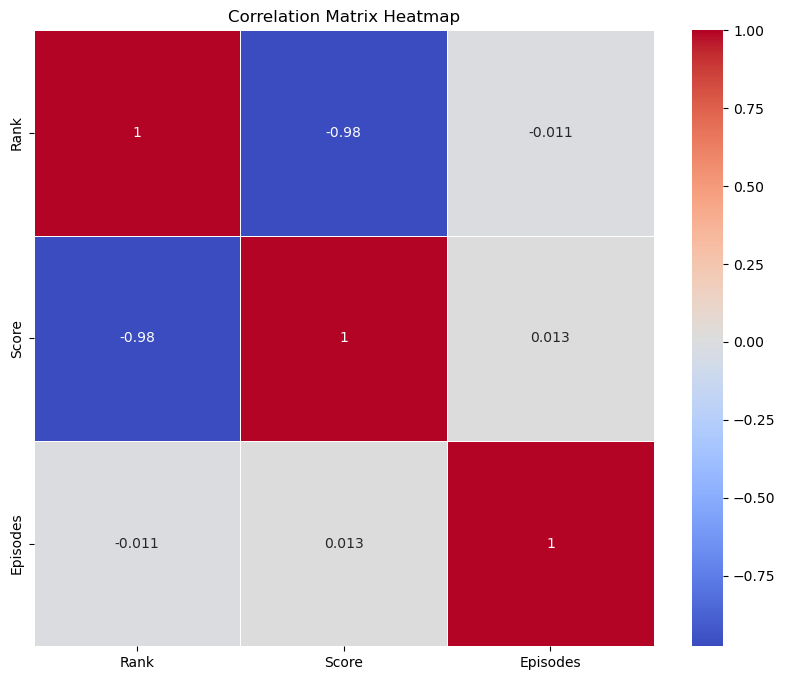

In [9]:
%matplotlib inline
# Correlation matrix
corr_matrix = super_df.corr()
print(corr_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

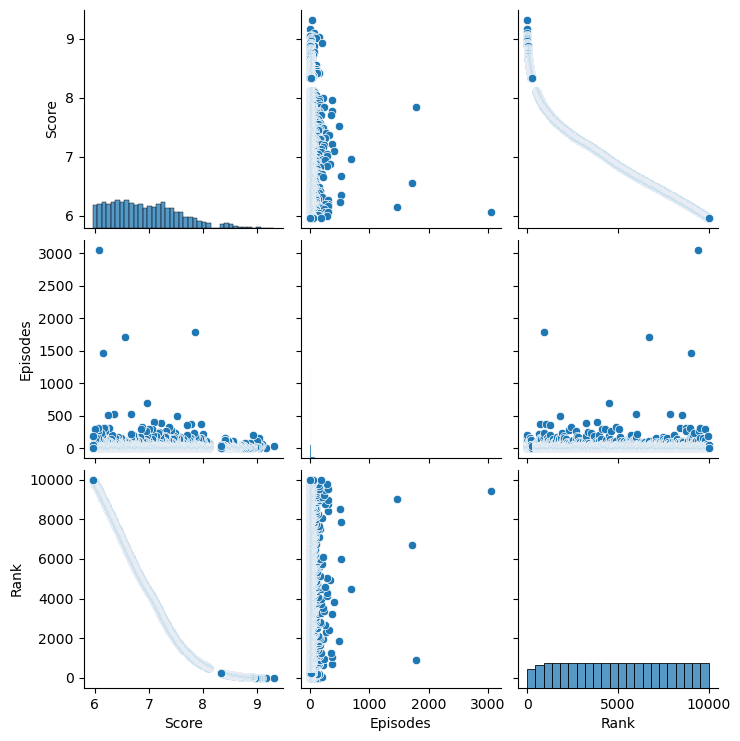

In [10]:
# Pair plots for numerical variables
sns.pairplot(super_df[['Score', 'Episodes', 'Rank']])
plt.show()

## Categorical variables

For categorical variables, we have multiple plots to see the frequency, as well as how well the variables can predict the average score of the anime.

<Axes: xlabel='class', ylabel='Count'>

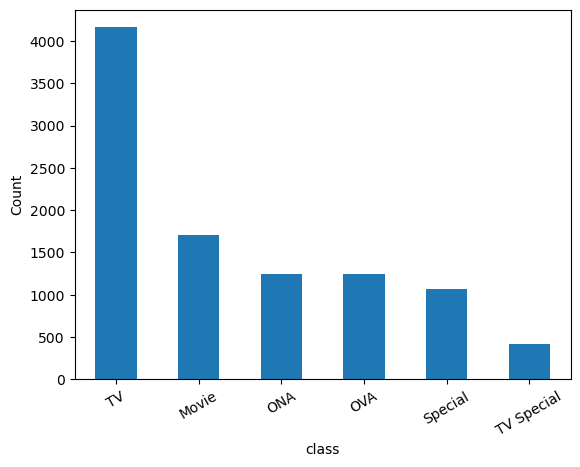

In [11]:
#Type analysis
super_df['Type'].value_counts().plot(kind='bar', xlabel='class', ylabel='Count', rot= 30)

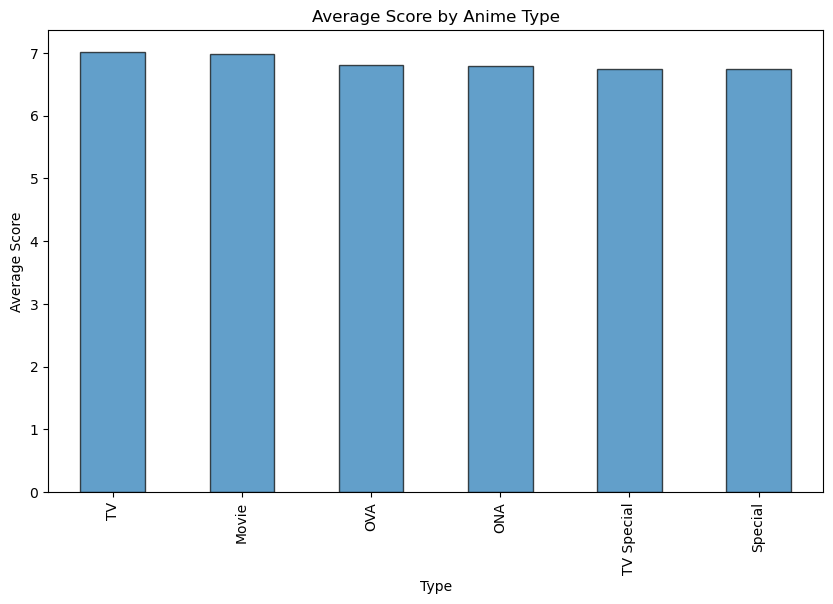

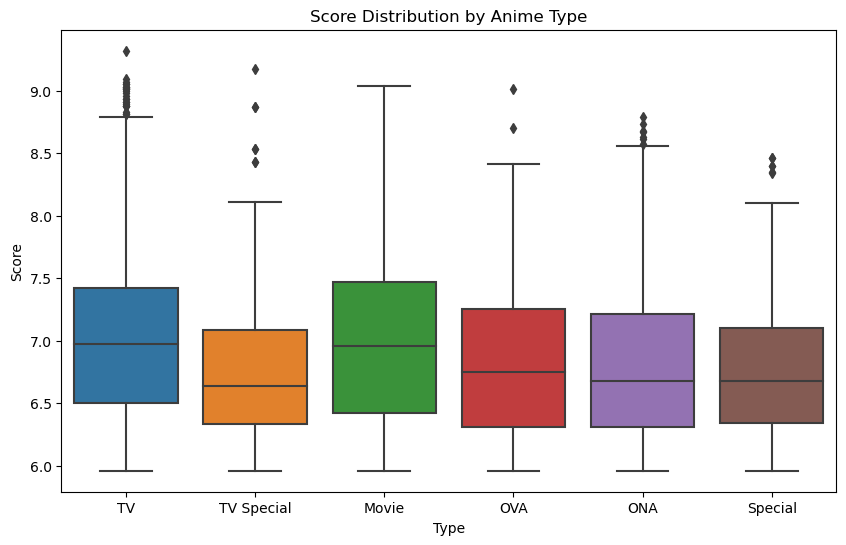

In [12]:
# Average score by type
type_scores = super_df.groupby('Type')['Score'].mean().sort_values(ascending=False)

# Bar plot of average score by type
plt.figure(figsize=(10, 6))
type_scores.plot(kind='bar', alpha=0.7, edgecolor='k')
plt.title('Average Score by Anime Type')
plt.xlabel('Type')
plt.ylabel('Average Score')
plt.show()

# Box plot of score distribution by type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Score', data=super_df)
plt.title('Score Distribution by Anime Type')
plt.xlabel('Type')
plt.ylabel('Score')
plt.show()


In [13]:
# Extract Season and Year from Premiered column
super_df['Premiered'] = super_df['Premiered'].astype(str)  # Ensure it's string type
super_df['Seasonal'] = super_df['Premiered'].apply(lambda x: x.split()[0] if len(x.split()) == 2 else None)
super_df['Year'] = super_df['Premiered'].apply(lambda x: x.split()[1] if len(x.split()) == 2 else None)

# Fill any remaining NaNs with 'Unknown' 
super_df['Seasonal'].fillna('Unknown', inplace=True) 
super_df['Year'].fillna('Unknown', inplace=True)

In [14]:
# Loop to convert Year to int except 'Unknown' 
def convert_year(year): 
    try: 
        return int(year) 
    except ValueError: 
        return 'Unknown' 
super_df['Year'] = super_df['Year'].apply(convert_year)

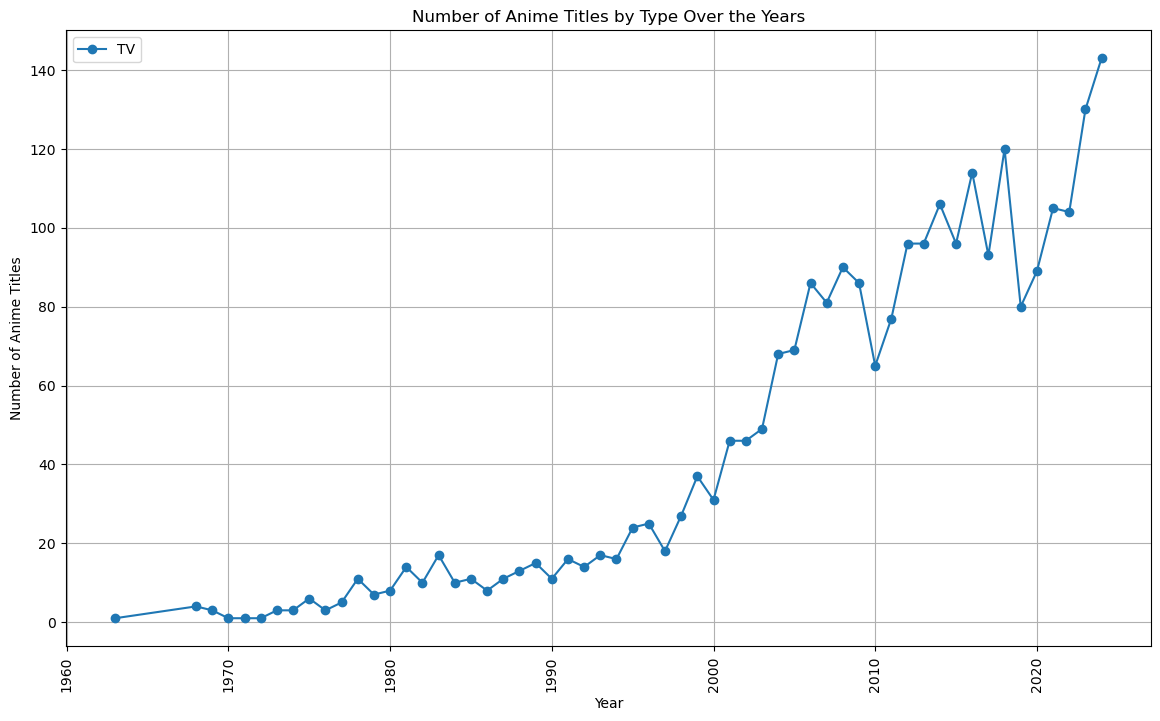

In [15]:
#Filter out the unknown year
more_plot = super_df[super_df['Year'] != 'Unknown']

# Count the number of anime titles by type over the years
type_year_counts = more_plot.groupby(['Year', 'Type']).size().unstack(fill_value=0)


# Line plot of number of anime titles by type over the years
plt.figure(figsize=(14, 8))
for anime_type in type_year_counts.columns:
    plt.plot(type_year_counts.index, type_year_counts[anime_type], marker='o', linestyle='-', label=anime_type)

plt.title('Number of Anime Titles by Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Anime Titles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


In [16]:
# Step 1: Split the Genres Column into Lists
super_df['all_Genres'] = super_df['Genres'].str.split(', ')

# Step 2: Get All Unique Genres
all_genres = set(genre for genres in super_df['all_Genres'] for genre in genres)

# Step 3: Create Boolean Columns for Each Genre
for genre in all_genres:
    super_df[genre] = super_df['Genres'].apply(lambda x: genre in x).astype(int)

# Drop the original Genres column if needed
# super_df = super_df.drop(columns=['Genres'])
# List of columns to drop 
columns_to_drop = ['G', 'e', 'n', 'r', 'e','s', 'n','o','t', 'f', 'o', 'u','d'] # Drop the specified columns 
super_df = super_df.drop(columns=columns_to_drop)


# Print the DataFrame
super_df

,Rank,Title,URL,Score,Genres,Episodes,Premiered,Studio,Type,Source,...,Team Sports,School,Shounen,Samurai,Time Travel,Military,Anthropomorphic,Supernatural,Pets,Gag Humor
0,1,Sousou no Frieren,https://myanimelist.net/anime/52991/Sousou_no_...,9.32,"Adventure, Drama, Fantasy, Shounen",28,Fall 2023,Madhouse,TV,Manga,...,0,0,1,0,0,0,0,0,0,0
1,2,One Piece Fan Letter,https://myanimelist.net/anime/60022/One_Piece_...,9.17,"Action, Adventure, Fantasy, Shounen",1,Premiered season not found,Toei Animation,TV Special,Light novel,...,0,0,1,0,0,0,0,0,0,0
2,3,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,9.09,"Action, Adventure, Drama, Fantasy, Military, S...",64,Spring 2009,Bones,TV,Manga,...,0,0,1,0,0,1,0,0,0,0
3,4,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,9.07,"Drama, Sci-Fi, Suspense, Psychological, Time T...",24,Spring 2011,White Fox,TV,Source not found,...,0,0,0,0,1,0,0,0,0,0
4,5,Shingeki no Kyojin Season 3 Part 2,https://myanimelist.net/anime/38524/Shingeki_n...,9.05,"Action, Drama, Suspense, Gore, Military, Survi...",10,Spring 2019,Wit Studio,TV,Manga,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,9996,Garugaku. II: Lucky Stars,https://myanimelist.net/anime/50495/Garugaku_I...,5.96,"Idols (Female), Music, School",50,Premiered season not found,OLM,TV,Source not found,...,0,1,0,0,0,0,0,0,0,0
9840,9997,Guan Hai Ce,https://myanimelist.net/anime/38689/Guan_Hai_Ce,5.96,"Action, Fantasy, Historical, Martial Arts, Mil...",16,Premiered season not found,Tong Ming Xuan,ONA,Source not found,...,0,0,0,0,0,1,0,0,0,0
9841,9998,Hatara Kids Mai Ham Gumi,https://myanimelist.net/anime/3251/Hatara_Kids...,5.96,"Action, Kids",50,Premiered season not found,Toei Animation,TV,Source not found,...,0,0,0,0,0,0,0,0,0,0
9842,9999,Hatsukoi Monster: Mou Chotto dake Tsuzukunja,https://myanimelist.net/anime/34016/Hatsukoi_M...,5.96,"Comedy, Romance, School, Shoujo",1,Premiered season not found,Studio Deen,OVA,Manga,...,0,1,0,0,0,0,0,0,0,0


In [17]:
trimmed = super_df.drop_duplicates(['Rank','Title','Score']).reset_index(drop=True)

In [18]:
trimmed

,Rank,Title,URL,Score,Genres,Episodes,Premiered,Studio,Type,Source,...,Team Sports,School,Shounen,Samurai,Time Travel,Military,Anthropomorphic,Supernatural,Pets,Gag Humor
0,1,Sousou no Frieren,https://myanimelist.net/anime/52991/Sousou_no_...,9.32,"Adventure, Drama, Fantasy, Shounen",28,Fall 2023,Madhouse,TV,Manga,...,0,0,1,0,0,0,0,0,0,0
1,2,One Piece Fan Letter,https://myanimelist.net/anime/60022/One_Piece_...,9.17,"Action, Adventure, Fantasy, Shounen",1,Premiered season not found,Toei Animation,TV Special,Light novel,...,0,0,1,0,0,0,0,0,0,0
2,3,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,9.09,"Action, Adventure, Drama, Fantasy, Military, S...",64,Spring 2009,Bones,TV,Manga,...,0,0,1,0,0,1,0,0,0,0
3,4,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,9.07,"Drama, Sci-Fi, Suspense, Psychological, Time T...",24,Spring 2011,White Fox,TV,Source not found,...,0,0,0,0,1,0,0,0,0,0
4,5,Shingeki no Kyojin Season 3 Part 2,https://myanimelist.net/anime/38524/Shingeki_n...,9.05,"Action, Drama, Suspense, Gore, Military, Survi...",10,Spring 2019,Wit Studio,TV,Manga,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9738,9996,Garugaku. II: Lucky Stars,https://myanimelist.net/anime/50495/Garugaku_I...,5.96,"Idols (Female), Music, School",50,Premiered season not found,OLM,TV,Source not found,...,0,1,0,0,0,0,0,0,0,0
9739,9997,Guan Hai Ce,https://myanimelist.net/anime/38689/Guan_Hai_Ce,5.96,"Action, Fantasy, Historical, Martial Arts, Mil...",16,Premiered season not found,Tong Ming Xuan,ONA,Source not found,...,0,0,0,0,0,1,0,0,0,0
9740,9998,Hatara Kids Mai Ham Gumi,https://myanimelist.net/anime/3251/Hatara_Kids...,5.96,"Action, Kids",50,Premiered season not found,Toei Animation,TV,Source not found,...,0,0,0,0,0,0,0,0,0,0
9741,9999,Hatsukoi Monster: Mou Chotto dake Tsuzukunja,https://myanimelist.net/anime/34016/Hatsukoi_M...,5.96,"Comedy, Romance, School, Shoujo",1,Premiered season not found,Studio Deen,OVA,Manga,...,0,1,0,0,0,0,0,0,0,0


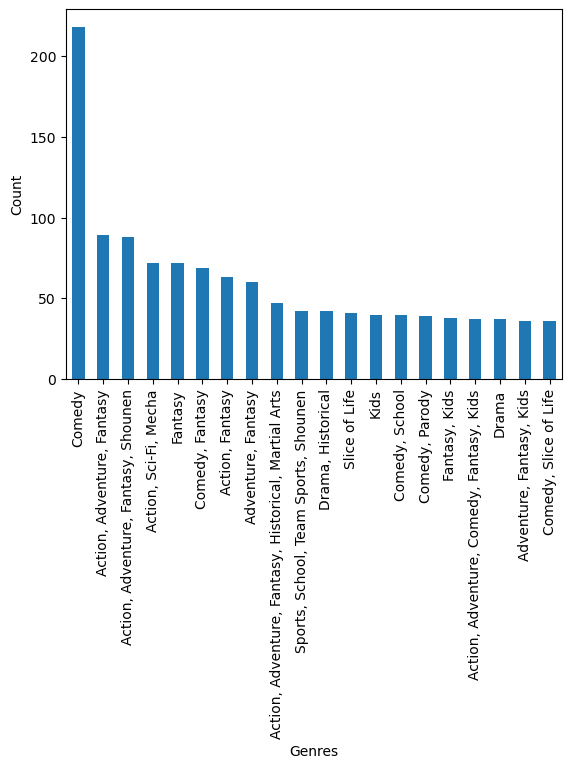

<Figure size 1500x600 with 0 Axes>

In [19]:
%matplotlib inline
#Split the Genres Column into Lists
super_df['all_Genres'] = super_df['Genres'].str.split(', ')

#Get All Unique Genres
all_genres = set(genre for genres in super_df['all_Genres'] for genre in genres)

# Get the top 20 genres combination by count
top_20_genres = super_df['Genres'].value_counts().nlargest(20)

# Plot the top 20 studios
top_20_genres.plot(kind='bar', xlabel='Genres', ylabel='Count', rot=90)

# Show the plot
plt.figure(figsize=(15, 6)) 
plt.show()

In [20]:
super_df.Episodes.unique()

<IntegerArray>
[  28,    1,   64,   24,   10,   51,  148,   13, <NA>,  110,
 ...
  510,  263,  312, 1471,  163,  122,  199,  230, 3057,  293]
Length: 182, dtype: Int64

In [21]:
# Find rows where 'Episodes' column is NaN 
na_rows = super_df[super_df['Episodes'].isna()] 
# Print the rows with NaN values in 'Episodes' column 
print(na_rows)

      Rank                                              Title  \
11      12            Bleach: Sennen Kessen-hen - Soukoku-tan   
57      58                                          One Piece   
454    604                                     Ranma ½ (2024)   
520    670                                  Dragon Ball Daima   
791    942                          Fairy Tail: 100-nen Quest   
865   1016                                   Crayon Shin-chan   
1090  1243                                    Doraemon (2005)   
1708  1859  Nanatsu no Taizai: Mokushiroku no Yonkishi 2nd...   
2182  2335                                     Pokemon (2023)   
2396  2549                                 Wonderful Precure!   
2417  2570                                           Chiikawa   
2427  2580  Hifuu Katsudou Kiroku: The Sealed Esoteric His...   
2506  2659                           Chibi Maruko-chan (1995)   
2879  3032     Touhou Niji Sousaku Doujin Anime: Musou Kakyou   
2912  3065               

In [22]:
# Replace NaN values in the 'Episodes' column with 1
super_df['Episodes'] = super_df['Episodes'].fillna(1)
super_df

,Rank,Title,URL,Score,Genres,Episodes,Premiered,Studio,Type,Source,...,Team Sports,School,Shounen,Samurai,Time Travel,Military,Anthropomorphic,Supernatural,Pets,Gag Humor
0,1,Sousou no Frieren,https://myanimelist.net/anime/52991/Sousou_no_...,9.32,"Adventure, Drama, Fantasy, Shounen",28,Fall 2023,Madhouse,TV,Manga,...,0,0,1,0,0,0,0,0,0,0
1,2,One Piece Fan Letter,https://myanimelist.net/anime/60022/One_Piece_...,9.17,"Action, Adventure, Fantasy, Shounen",1,Premiered season not found,Toei Animation,TV Special,Light novel,...,0,0,1,0,0,0,0,0,0,0
2,3,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,9.09,"Action, Adventure, Drama, Fantasy, Military, S...",64,Spring 2009,Bones,TV,Manga,...,0,0,1,0,0,1,0,0,0,0
3,4,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,9.07,"Drama, Sci-Fi, Suspense, Psychological, Time T...",24,Spring 2011,White Fox,TV,Source not found,...,0,0,0,0,1,0,0,0,0,0
4,5,Shingeki no Kyojin Season 3 Part 2,https://myanimelist.net/anime/38524/Shingeki_n...,9.05,"Action, Drama, Suspense, Gore, Military, Survi...",10,Spring 2019,Wit Studio,TV,Manga,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,9996,Garugaku. II: Lucky Stars,https://myanimelist.net/anime/50495/Garugaku_I...,5.96,"Idols (Female), Music, School",50,Premiered season not found,OLM,TV,Source not found,...,0,1,0,0,0,0,0,0,0,0
9840,9997,Guan Hai Ce,https://myanimelist.net/anime/38689/Guan_Hai_Ce,5.96,"Action, Fantasy, Historical, Martial Arts, Mil...",16,Premiered season not found,Tong Ming Xuan,ONA,Source not found,...,0,0,0,0,0,1,0,0,0,0
9841,9998,Hatara Kids Mai Ham Gumi,https://myanimelist.net/anime/3251/Hatara_Kids...,5.96,"Action, Kids",50,Premiered season not found,Toei Animation,TV,Source not found,...,0,0,0,0,0,0,0,0,0,0
9842,9999,Hatsukoi Monster: Mou Chotto dake Tsuzukunja,https://myanimelist.net/anime/34016/Hatsukoi_M...,5.96,"Comedy, Romance, School, Shoujo",1,Premiered season not found,Studio Deen,OVA,Manga,...,0,1,0,0,0,0,0,0,0,0


In [23]:
# Grouping by genres and calculating average Scores
genre_ranking = super_df.groupby('Genres')['Score'].mean().sort_values()
print(genre_ranking)

Genres
Action, Fantasy, Historical, Martial Arts, Military                               5.96
Action, Adventure, Comedy, Historical                                             5.96
Action, Drama, Sci-Fi, Mecha, Military, Space, Shounen                            5.96
Horror, School                                                                    5.96
Award Winning, Drama, Supernatural, Historical                                    5.96
                                                                                  ... 
Action, Award Winning, Drama, Sci-Fi, Mecha, Military, Super Power                8.91
Award Winning, Drama, Shounen                                                     8.93
Drama, Romance, Supernatural, Shoujo                                              8.96
Action, Comedy, Drama, Sci-Fi, Gag Humor, Historical, Parody, Samurai, Shounen    9.04
Drama, Sci-Fi, Suspense, Psychological, Time Travel                               9.07
Name: Score, Length: 3901, dtype: fl

In [24]:
# Compute summary statistics for numerical columns 
summary_stats = super_df.describe() 
print(summary_stats) 
# Compute value counts for categorical variables 
super_df['Genres'] = super_df['Genres'].str.split(', ') 
super_df = super_df.explode('Genres')
# Compute value counts for genres 
genre_counts = super_df['Genres'].value_counts() 
print(genre_counts)
studio_counts = super_df['Studio'].value_counts() 
print(studio_counts)

               Rank        Score   Episodes  Combat Sports        Harem  \
count   9844.000000  9844.000000     9844.0    9844.000000  9844.000000   
mean    5068.976534     6.915924  15.481004       0.006908     0.044900   
std     2854.113609     0.624616  50.504744       0.082830     0.207096   
min        1.000000     5.960000        1.0       0.000000     0.000000   
25%     2613.750000     6.410000        1.0       0.000000     0.000000   
50%     5075.500000     6.840000       10.0       0.000000     0.000000   
75%     7537.250000     7.330000       13.0       0.000000     0.000000   
max    10000.000000     9.320000     3057.0       1.000000     1.000000   

        Villainess        CGDCT  Strategy Game       Comedy   Historical  ...  \
count  9844.000000  9844.000000    9844.000000  9844.000000  9844.000000  ...   
mean      0.001219     0.021942       0.018488     0.393742     0.084417  ...   
std       0.034895     0.146503       0.134716     0.488604     0.278026  ...   


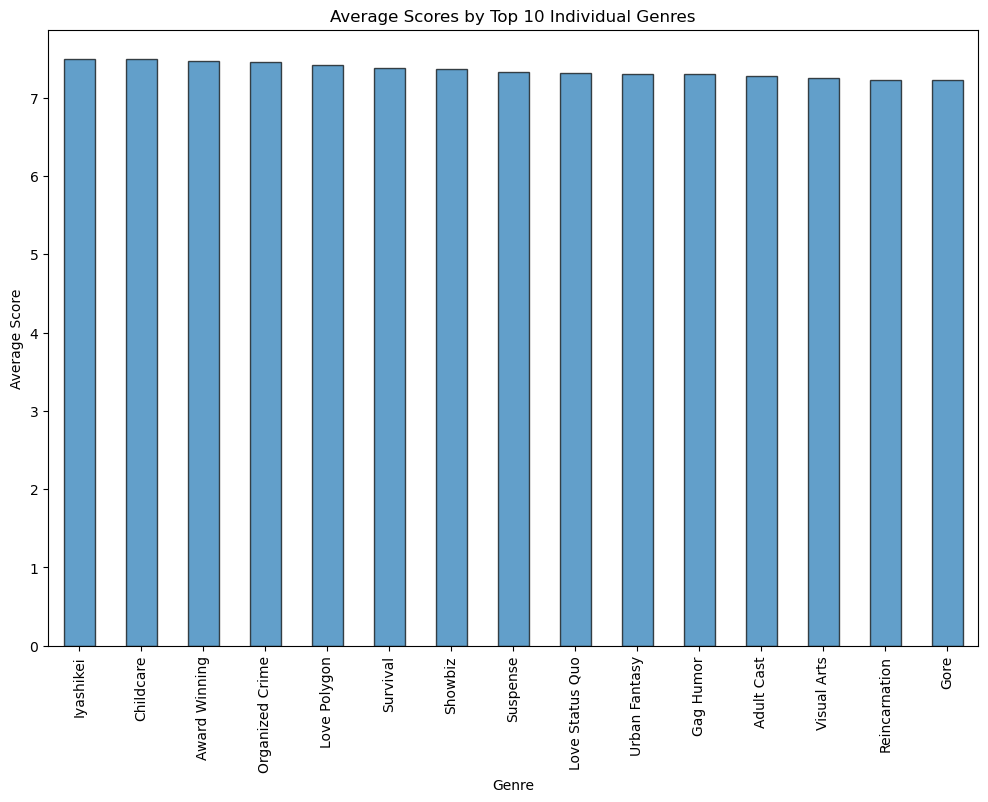

In [25]:
# Grouping by individual genres and calculating average scores 
genre_ranking = super_df.groupby('Genres')['Score'].mean().sort_values(ascending=False) 
# Select the top 10 genres 
top_10_genres = genre_ranking.head(15) 
# Bar chart of average scores by top 10 genres 
plt.figure(figsize=(12, 8)) 
top_10_genres.plot(kind='bar', alpha=0.7, edgecolor='k') 
plt.title('Average Scores by Top 10 Individual Genres') 
plt.xlabel('Genre') 
plt.ylabel('Average Score') 
plt.xticks(rotation=90) 
# Save the plot as an image 
plt.savefig('average_scores_by_top_15_individual_genres.png', format='png') 
plt.show()

In [26]:
super_df

,Rank,Title,URL,Score,Genres,Episodes,Premiered,Studio,Type,Source,...,Team Sports,School,Shounen,Samurai,Time Travel,Military,Anthropomorphic,Supernatural,Pets,Gag Humor
0,1,Sousou no Frieren,https://myanimelist.net/anime/52991/Sousou_no_...,9.32,Adventure,28,Fall 2023,Madhouse,TV,Manga,...,0,0,1,0,0,0,0,0,0,0
0,1,Sousou no Frieren,https://myanimelist.net/anime/52991/Sousou_no_...,9.32,Drama,28,Fall 2023,Madhouse,TV,Manga,...,0,0,1,0,0,0,0,0,0,0
0,1,Sousou no Frieren,https://myanimelist.net/anime/52991/Sousou_no_...,9.32,Fantasy,28,Fall 2023,Madhouse,TV,Manga,...,0,0,1,0,0,0,0,0,0,0
0,1,Sousou no Frieren,https://myanimelist.net/anime/52991/Sousou_no_...,9.32,Shounen,28,Fall 2023,Madhouse,TV,Manga,...,0,0,1,0,0,0,0,0,0,0
1,2,One Piece Fan Letter,https://myanimelist.net/anime/60022/One_Piece_...,9.17,Action,1,Premiered season not found,Toei Animation,TV Special,Light novel,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842,9999,Hatsukoi Monster: Mou Chotto dake Tsuzukunja,https://myanimelist.net/anime/34016/Hatsukoi_M...,5.96,Romance,1,Premiered season not found,Studio Deen,OVA,Manga,...,0,1,0,0,0,0,0,0,0,0
9842,9999,Hatsukoi Monster: Mou Chotto dake Tsuzukunja,https://myanimelist.net/anime/34016/Hatsukoi_M...,5.96,School,1,Premiered season not found,Studio Deen,OVA,Manga,...,0,1,0,0,0,0,0,0,0,0
9842,9999,Hatsukoi Monster: Mou Chotto dake Tsuzukunja,https://myanimelist.net/anime/34016/Hatsukoi_M...,5.96,Shoujo,1,Premiered season not found,Studio Deen,OVA,Manga,...,0,1,0,0,0,0,0,0,0,0
9843,10000,Hello Kitty no Kieta Santa-san no Boushi,https://myanimelist.net/anime/22481/Hello_Kitt...,5.96,Fantasy,1,Premiered season not found,add some,OVA,Source not found,...,0,0,0,0,0,0,0,0,0,0


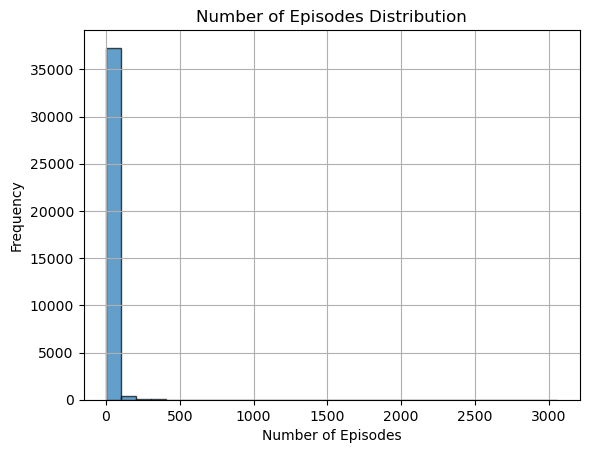

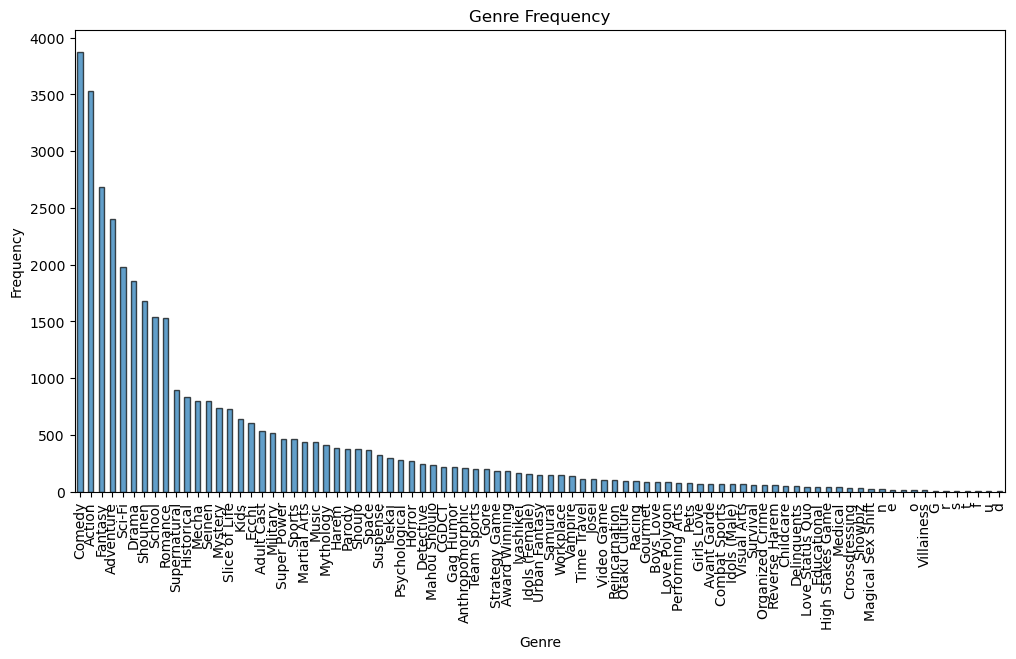

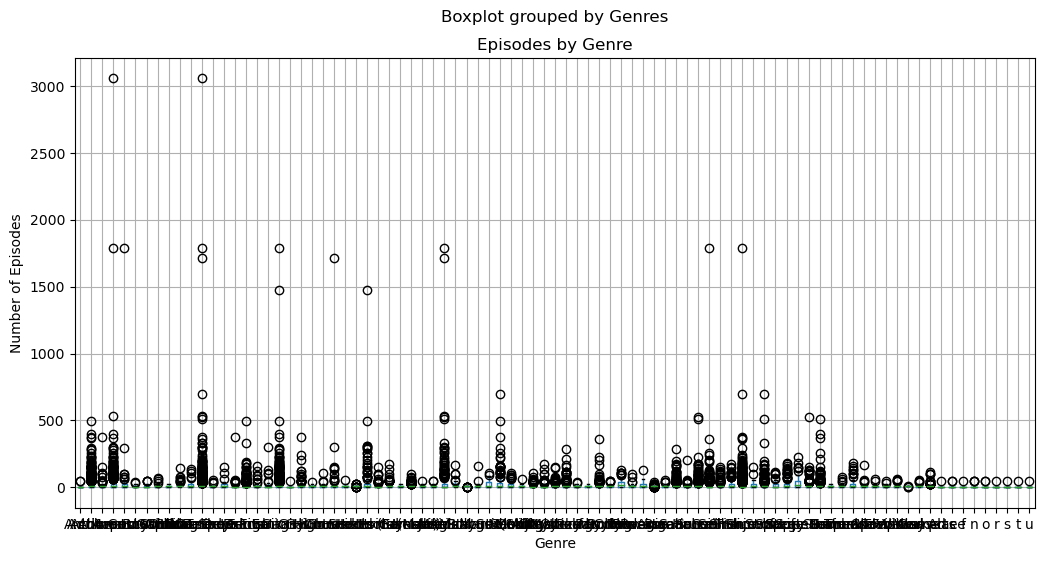

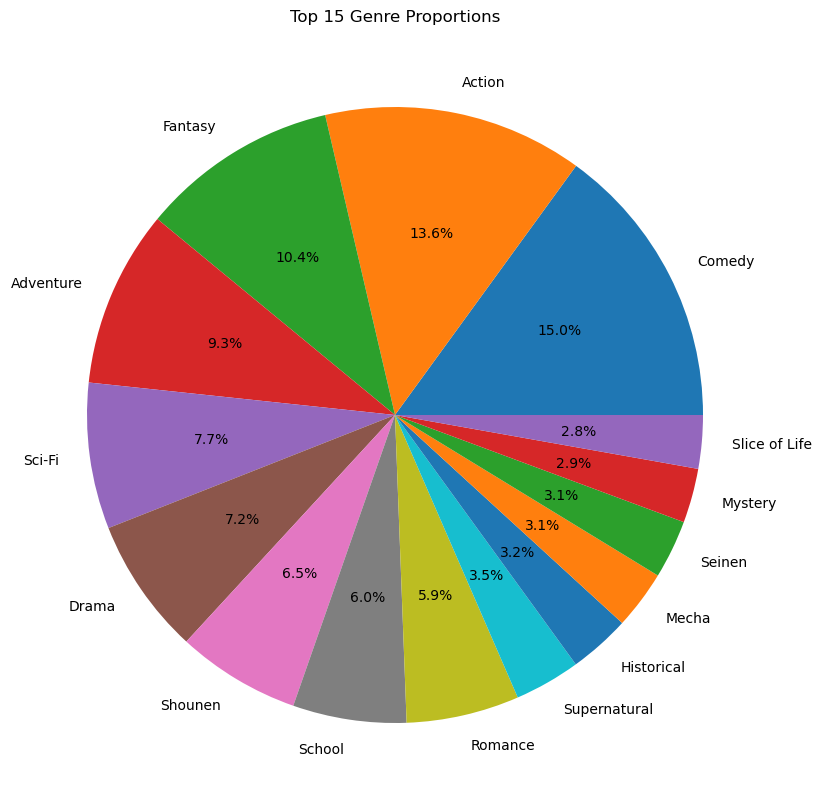

In [27]:

# Histograms for numerical features
super_df['Episodes'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.title('Number of Episodes Distribution')
plt.xlabel('Number of Episodes')
plt.ylabel('Frequency')
plt.show()

# Bar plots for categorical variables
genre_counts.plot(kind='bar', figsize=(12, 6), alpha=0.7, edgecolor='k')
plt.title('Genre Frequency')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

# Box plots for numerical features across genres
super_df.boxplot(column='Episodes', by='Genres', figsize=(12, 6))
plt.title('Episodes by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Episodes')
plt.show()


# Select the top 15 genres
top_15_genres = genre_counts.head(15)

# Pie chart of the top 15 genres
plt.figure(figsize=(10, 10))
top_15_genres.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 15 Genre Proportions')
plt.ylabel('')
plt.show()


Fall      3550
Spring    3526
Winter    2104
Summer    2033
Name: Seasonal, dtype: int64


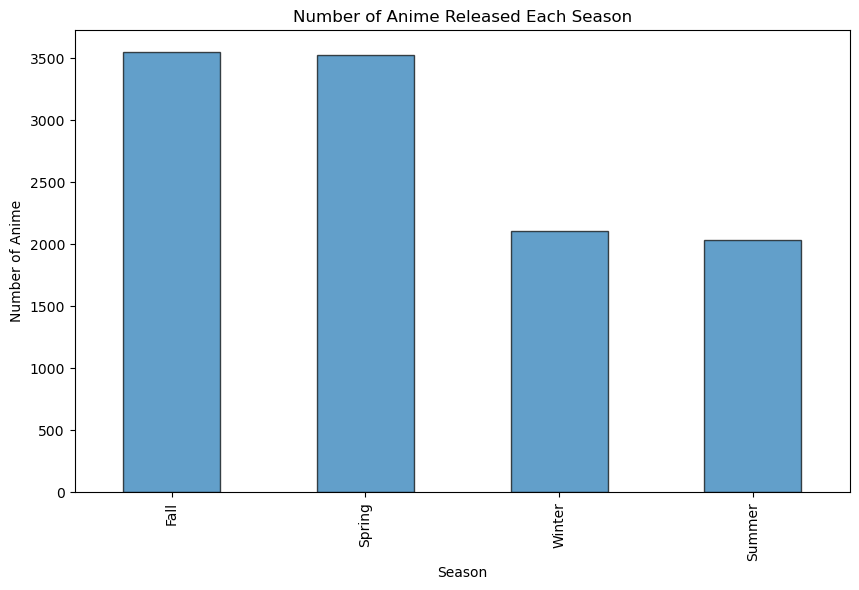

Seasonal
Summer    7.390821
Winter    7.437001
Spring    7.456517
Fall      7.464315
Name: Score, dtype: float64


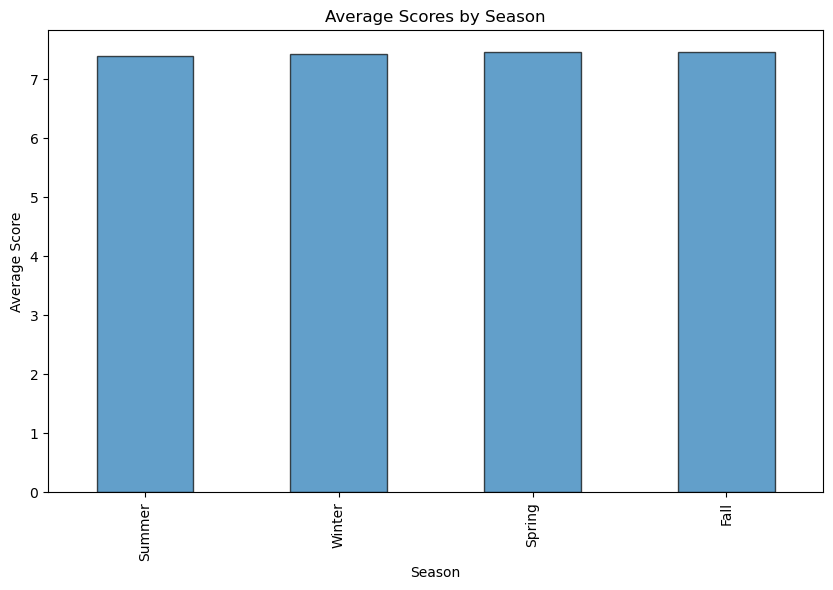

1963      1
1968      4
1969      3
1970      1
1971      1
1972      1
1973      3
1974      3
1975      6
1976      3
1977      5
1978     11
1979      7
1980      8
1981     14
1982     10
1983     17
1984     10
1985     11
1986      8
1987     11
1988     13
1989     15
1990     11
1991     16
1992     14
1993     17
1994     16
1995     24
1996     25
1997     18
1998     27
1999     37
2000     31
2001     46
2002     46
2003     49
2004     68
2005     69
2006     86
2007     81
2008     90
2009     86
2010     65
2011     77
2012     96
2013     96
2014    106
2015     96
2016    114
2017     93
2018    120
2019     80
2020     89
2021    105
2022    104
2023    130
2024    143
Name: Year, dtype: int64


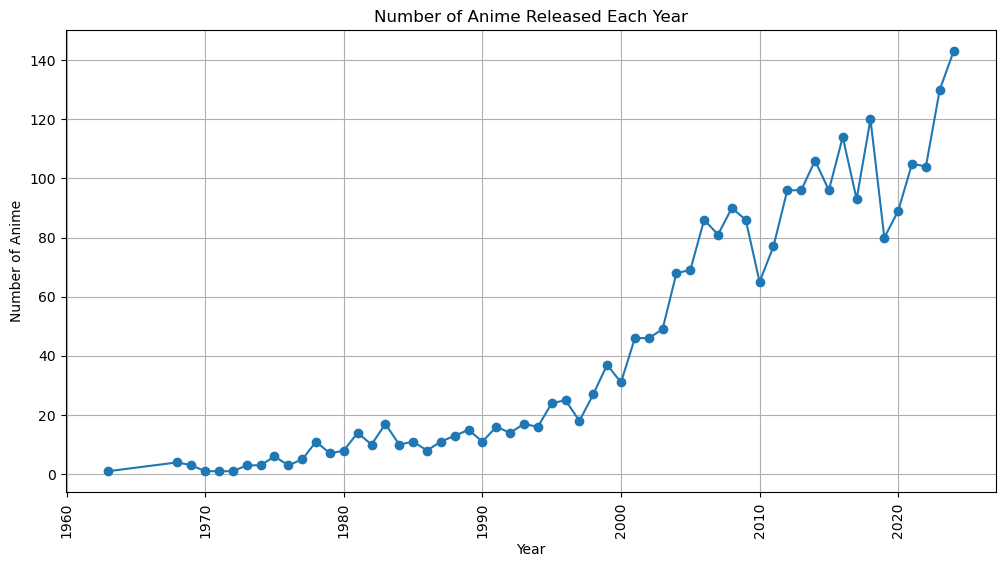

Year
1963    7.080000
1968    6.825556
1969    7.242857
1970    6.760000
1971    7.620000
1972    6.940000
1973    7.258750
1974    7.378571
1975    7.206667
1976    7.340000
1977    7.401739
1978    7.438000
1979    7.630000
1980    7.327647
1981    7.115098
1982    7.414750
1983    7.171646
1984    7.282558
1985    7.306200
1986    7.474375
1987    7.358222
1988    7.202979
1989    7.301695
1990    7.097391
1991    7.307091
1992    7.500702
1993    7.313438
1994    7.334198
1995    7.344336
1996    7.408000
1997    7.337284
1998    7.319845
1999    7.379503
2000    7.231258
2001    7.270615
2002    7.410352
2003    7.306025
2004    7.335138
2005    7.395882
2006    7.365204
2007    7.454556
2008    7.328689
2009    7.438468
2010    7.412219
2011    7.527522
2012    7.498643
2013    7.402664
2014    7.480331
2015    7.412976
2016    7.451033
2017    7.579433
2018    7.495651
2019    7.645838
2020    7.494721
2021    7.590987
2022    7.596134
2023    7.521363
2024    7.531842
Name: Sco

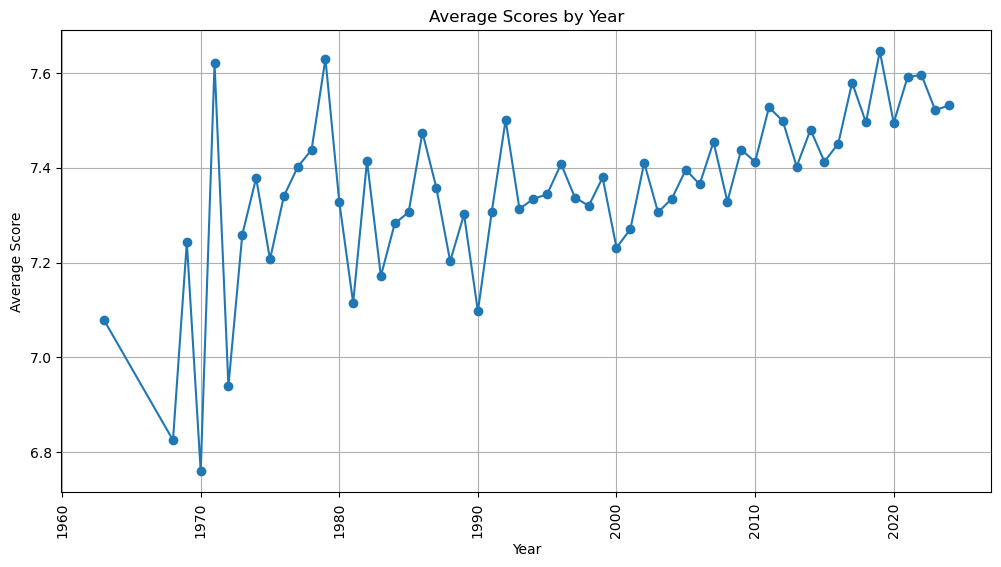

In [28]:
#Filter out the unknown year
more_plot1 = super_df[super_df['Seasonal'] != 'Unknown']

# Analysis: Number of anime released each season
season_counts = more_plot1['Seasonal'].value_counts()
print(season_counts)

# Bar plot of number of anime released each season
season_counts.plot(kind='bar', figsize=(10, 6), alpha=0.7, edgecolor='k')
plt.title('Number of Anime Released Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Anime')
plt.show()

# Analysis: Average score by season
season_score = more_plot1.groupby('Seasonal')['Score'].mean().sort_values()
print(season_score)

# Bar plot of average scores by season
season_score.plot(kind='bar', figsize=(10, 6), alpha=0.7, edgecolor='k')
plt.title('Average Scores by Season')
plt.xlabel('Season')
plt.ylabel('Average Score')
plt.show()

# Analysis: Number of anime released each year
year_counts = more_plot['Year'].value_counts().sort_index()
print(year_counts)

# Line plot of number of anime released each year
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-')
plt.title('Number of Anime Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Anime')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

# Analysis: Average score by year
year_score = more_plot1.groupby('Year')['Score'].mean().sort_index()
print(year_score)

# Line plot of average scores by year
plt.figure(figsize=(12, 6))
plt.plot(year_score.index, year_score.values, marker='o', linestyle='-')
plt.title('Average Scores by Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


In [29]:
trimmed.groupby('Year').count()['Rank']

Year
1963          1
1968          4
1969          3
1970          1
1971          1
1972          1
1973          3
1974          3
1975          6
1976          3
1977          5
1978         11
1979          7
1980          8
1981         14
1982         10
1983         17
1984         10
1985         11
1986          8
1987         11
1988         13
1989         15
1990         11
1991         16
1992         13
1993         17
1994         16
1995         24
1996         25
1997         18
1998         27
1999         36
2000         31
2001         46
2002         45
2003         49
2004         66
2005         69
2006         86
2007         80
2008         89
2009         84
2010         64
2011         75
2012         93
2013         95
2014        104
2015         94
2016        109
2017         90
2018        114
2019         74
2020         86
2021         99
2022        100
2023        129
2024        138
Unknown    7265
Name: Rank, dtype: int64

In [30]:
pd.set_option('display.max_columns', 100)
more_plot1[more_plot1['Year']<1975]

,Rank,Title,URL,Score,Genres,Episodes,Premiered,Studio,Type,Source,Seasonal,Year,all_Genres,Combat Sports,Harem,Villainess,CGDCT,Strategy Game,Comedy,Historical,Video Game,Kids,Magical Sex Shift,Gore,Reincarnation,Psychological,Award Winning,Avant Garde,Educational,Workplace,Showbiz,Mystery,Suspense,Vampire,Girls Love,Racing,Urban Fantasy,Space,Childcare,Visual Arts,Boys Love,Love Status Quo,Performing Arts,Idols (Female),Romance,Adult Cast,Organized Crime,Music,Horror,Reverse Harem,Mecha,Drama,Action,Parody,Otaku Culture,Sports,Medical,Mahou Shoujo,Slice of Life,Seinen,Isekai,Martial Arts,Shoujo,,Adventure,Delinquents,Fantasy,Detective,Mythology,Idols (Male),Iyashikei,Ecchi,High Stakes Game,Survival,Gourmet,Sci-Fi,Super Power,Josei,Crossdressing,Love Polygon,Team Sports,School,Shounen,Samurai,Time Travel,Military,Anthropomorphic,Supernatural,Pets,Gag Humor
1329,1483,Lupin III,https://myanimelist.net/anime/1412/Lupin_III,7.62,Action,23,Fall 1971,Tokyo Movie Shinsha,TV,Manga,Fall,1971,"[Action, Adventure, Comedy, Mystery, Adult Cas...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1329,1483,Lupin III,https://myanimelist.net/anime/1412/Lupin_III,7.62,Adventure,23,Fall 1971,Tokyo Movie Shinsha,TV,Manga,Fall,1971,"[Action, Adventure, Comedy, Mystery, Adult Cas...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1329,1483,Lupin III,https://myanimelist.net/anime/1412/Lupin_III,7.62,Comedy,23,Fall 1971,Tokyo Movie Shinsha,TV,Manga,Fall,1971,"[Action, Adventure, Comedy, Mystery, Adult Cas...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1329,1483,Lupin III,https://myanimelist.net/anime/1412/Lupin_III,7.62,Mystery,23,Fall 1971,Tokyo Movie Shinsha,TV,Manga,Fall,1971,"[Action, Adventure, Comedy, Mystery, Adult Cas...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1329,1483,Lupin III,https://myanimelist.net/anime/1412/Lupin_III,7.62,Adult Cast,23,Fall 1971,Tokyo Movie Shinsha,TV,Manga,Fall,1971,"[Action, Adventure, Comedy, Mystery, Adult Cas...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5341,5495,Gegege no Kitarou (1968),https://myanimelist.net/anime/5688/Gegege_no_K...,6.76,Adventure,65,Winter 1968,Toei Animation,TV,Manga,Winter,1968,"[Adventure, Comedy, Fantasy, Horror, Supernatu...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5341,5495,Gegege no Kitarou (1968),https://myanimelist.net/anime/5688/Gegege_no_K...,6.76,Comedy,65,Winter 1968,Toei Animation,TV,Manga,Winter,1968,"[Adventure, Comedy, Fantasy, Horror, Supernatu...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5341,5495,Gegege no Kitarou (1968),https://myanimelist.net/anime/5688/Gegege_no_K...,6.76,Fantasy,65,Winter 1968,Toei Animation,TV,Manga,Winter,1968,"[Adventure, Comedy, Fantasy, Horror, Supernatu...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5341,5495,Gegege 

In [31]:
super_df['Year'].describe()

count       37840
unique         59
top       Unknown
freq        26627
Name: Year, dtype: object

Comedy       3876
Action       3527
Fantasy      2683
Adventure    2402
Sci-Fi       1981
             ... 
s               9
t               9
f               9
u               9
d               9
Name: Genres, Length: 87, dtype: int64


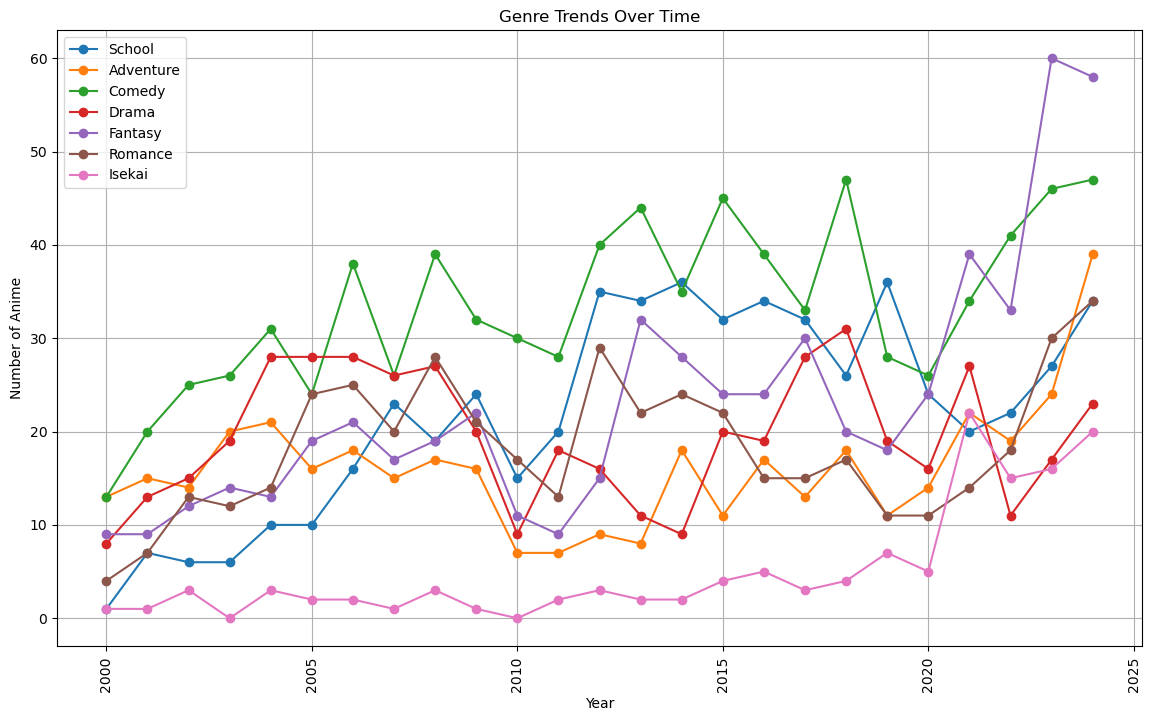

In [32]:
# Genre popularity and trends
genre_combinations = super_df['Genres'].value_counts()
print(genre_combinations)

df_2000s = more_plot1[more_plot1['Year'] >= 2000]


#analyze genre trends over time if you have a 'Year' column
# Count the number of anime by genre for each year 
genre_year_counts = df_2000s.groupby(['Year', 'Genres']).size().reset_index(name='Count')

# Pivot the table to have years as rows and genres as columns 
pivot_table = genre_year_counts.pivot(index='Year', columns='Genres', values='Count').fillna(0) 
# Plot the trends of a few selected genres over time 
genres_to_plot = ['School', 'Adventure', 'Comedy', 'Drama', 'Fantasy','Romance','Isekai'] 
# Select genres of interest 
plt.figure(figsize=(14, 8)) 
for genre in genres_to_plot: 
    if genre in pivot_table.columns: 
        plt.plot(pivot_table.index, pivot_table[genre], marker='o', label=genre) 
    
plt.title('Genre Trends Over Time') 
plt.xlabel('Year') 
plt.ylabel('Number of Anime') 
plt.legend() 
plt.grid(True) 
plt.xticks(rotation=90) 
plt.show()

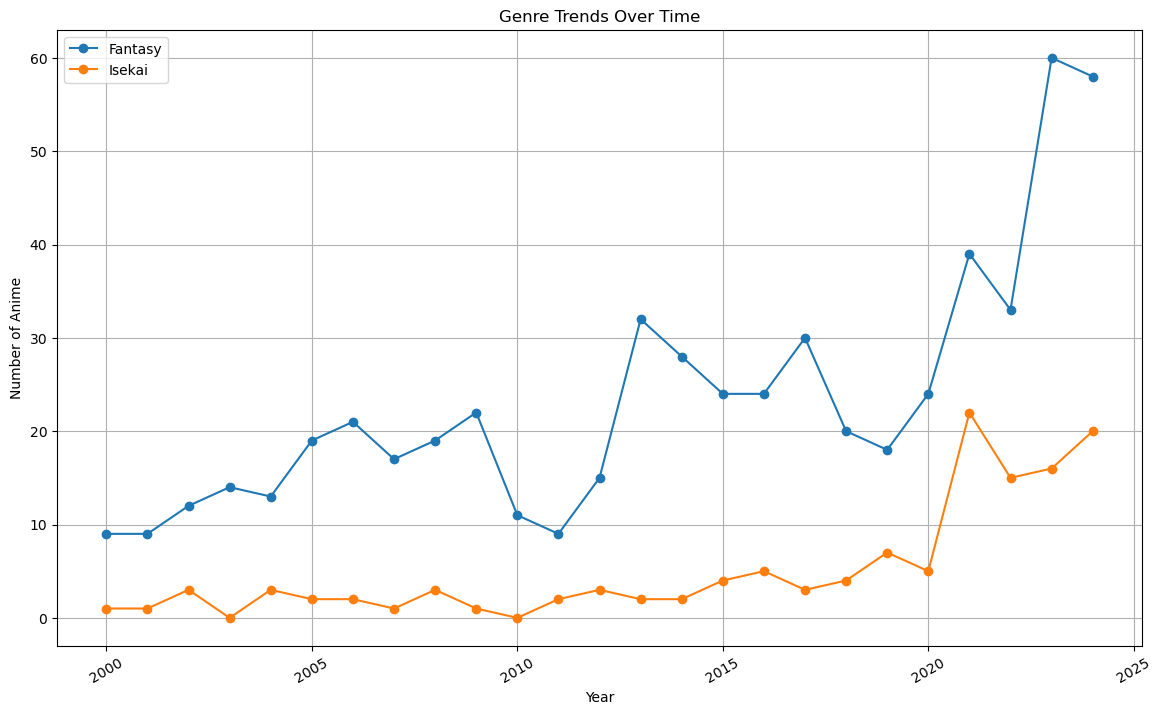

In [33]:
# Plot the trends of a few selected genres over time 
genres_to_plot = ['Fantasy','Isekai'] 
# Select genres of interest 
plt.figure(figsize=(14, 8)) 
for genre in genres_to_plot: 
    if genre in pivot_table.columns: 
        plt.plot(pivot_table.index, pivot_table[genre], marker='o', label=genre) 
    
plt.title('Genre Trends Over Time') 
plt.xlabel('Year') 
plt.ylabel('Number of Anime') 
plt.legend() 
plt.grid(True) 
plt.xticks(rotation=30) 
plt.show()

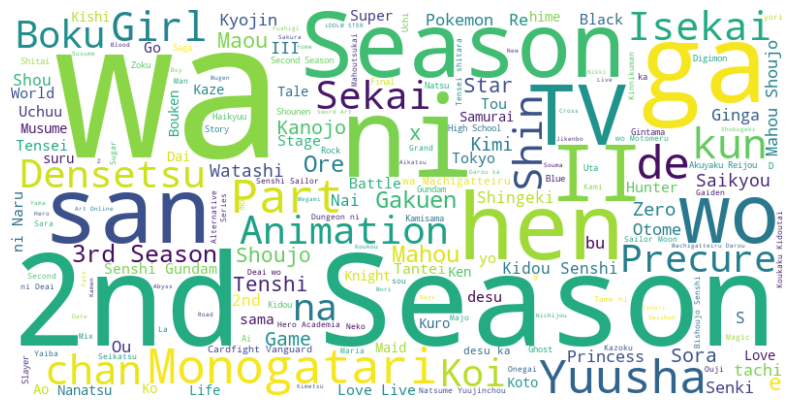

In [34]:
from wordcloud import WordCloud

# Create a word cloud for anime titles or synopses
text = " ".join(title for title in more_plot['Title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

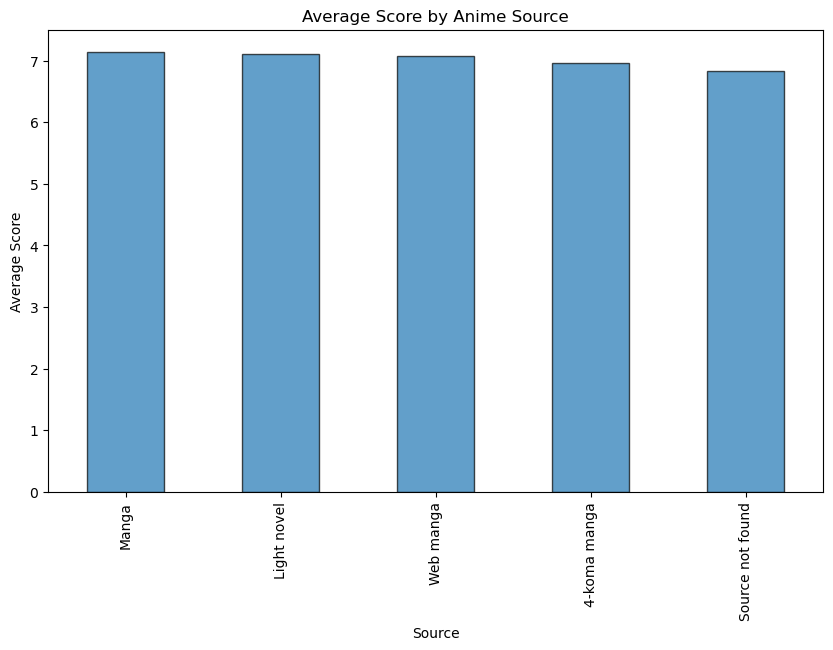

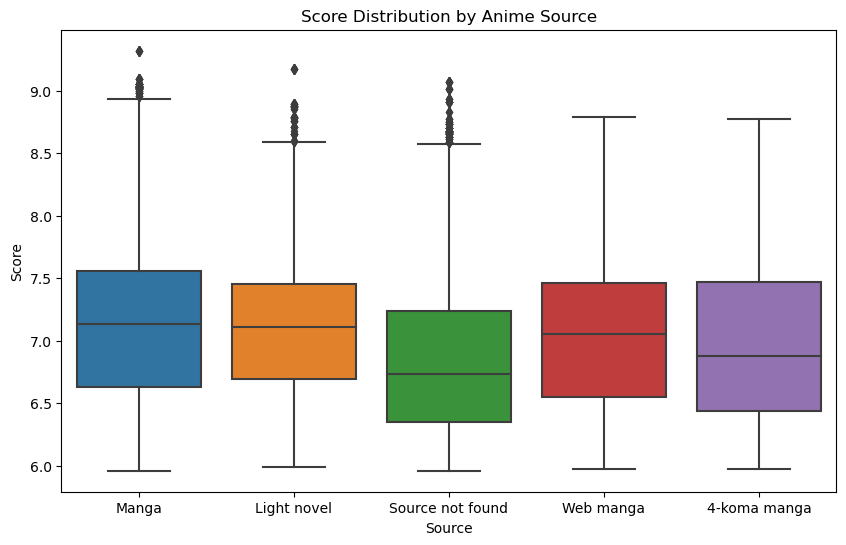

In [35]:
# Average score by source
source_scores = super_df.groupby('Source')['Score'].mean().sort_values(ascending=False)

# Bar plot of average score by source
plt.figure(figsize=(10, 6))
source_scores.plot(kind='bar', alpha=0.7, edgecolor='k')
plt.title('Average Score by Anime Source')
plt.xlabel('Source')
plt.ylabel('Average Score')
plt.show()

# Box plot of score distribution by source
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Score', data=super_df)
plt.title('Score Distribution by Anime Source')
plt.xlabel('Source')
plt.ylabel('Score')
plt.show()


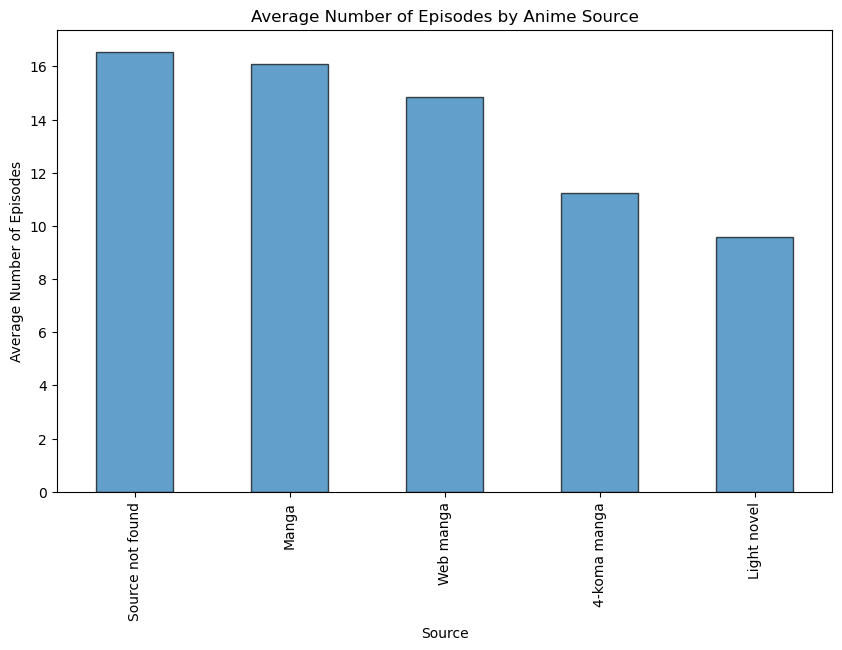

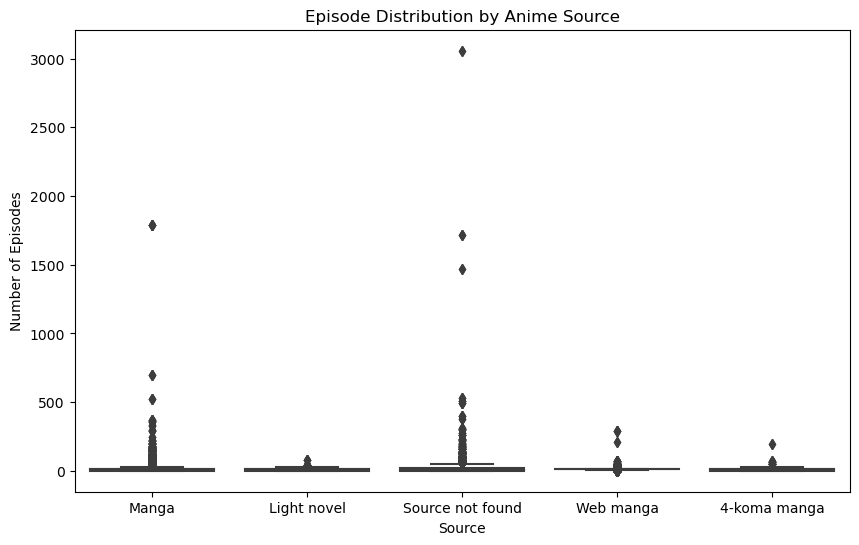

In [36]:
# Average number of episodes by source
source_episodes = super_df.groupby('Source')['Episodes'].mean().sort_values(ascending=False)

# Bar plot of average number of episodes by source
plt.figure(figsize=(10, 6))
source_episodes.plot(kind='bar', alpha=0.7, edgecolor='k')
plt.title('Average Number of Episodes by Anime Source')
plt.xlabel('Source')
plt.ylabel('Average Number of Episodes')
plt.show()

# Box plot of episode distribution by source
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Episodes', data=super_df)
plt.title('Episode Distribution by Anime Source')
plt.xlabel('Source')
plt.ylabel('Number of Episodes')
plt.show()


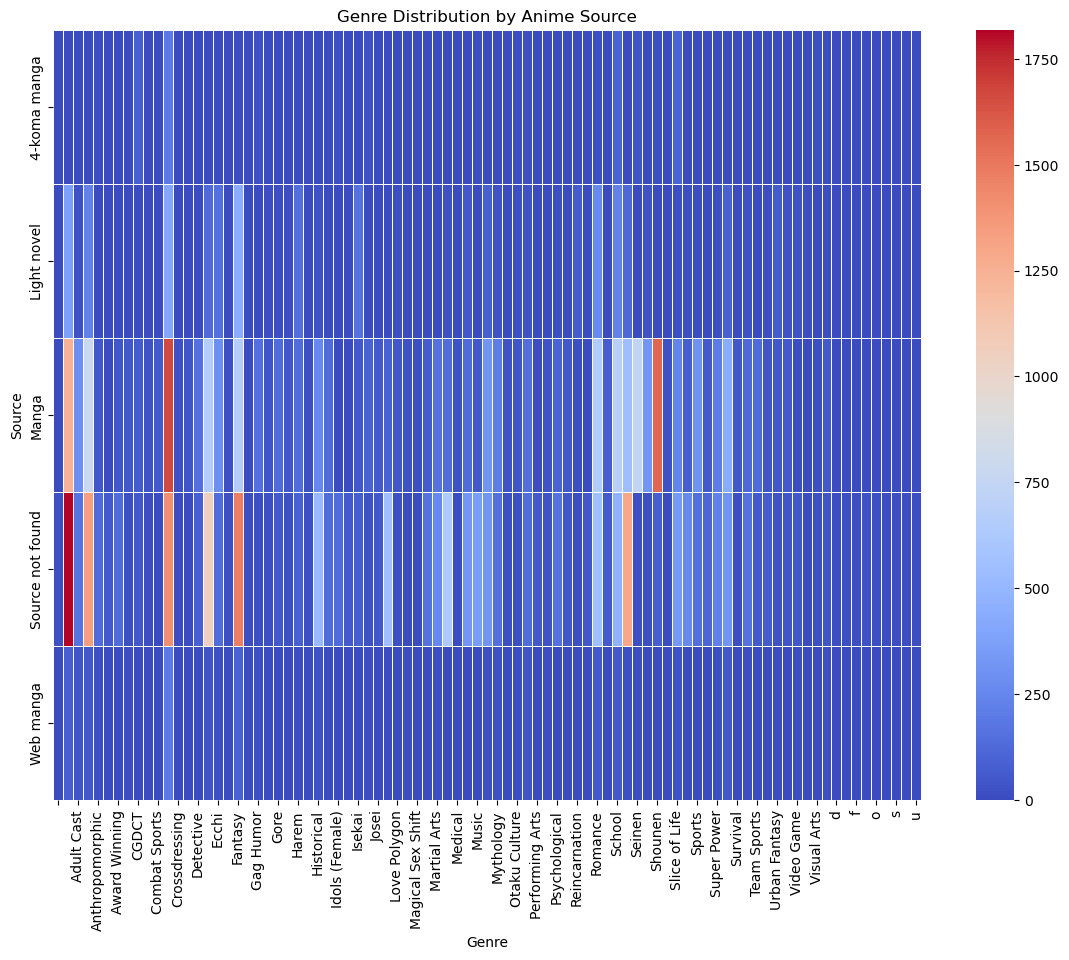

In [37]:
# Count the number of genres by source
source_genre_counts = super_df.groupby(['Source', 'Genres']).size().unstack(fill_value=0)

# Heatmap of genre distribution by source
plt.figure(figsize=(14, 10))
sns.heatmap(source_genre_counts, cmap='coolwarm', linewidths=0.5)
plt.title('Genre Distribution by Anime Source')
plt.xlabel('Genre')
plt.ylabel('Source')
plt.show()


Toei Animation          2250
Sunrise                 1925
add some                1732
J.C.Staff               1352
Madhouse                1241
Production I.G          1169
Studio Deen             1089
TMS Entertainment       1041
Pierrot                  917
OLM                      912
A-1 Pictures             772
Shin-Ei Animation        699
Bones                    623
Nippon Animation         550
Gonzo                    545
Xebec                    510
AIC                      507
Shaft                    472
SILVER LINK.             459
Tatsunoko Production     458
Name: Studio, dtype: int64


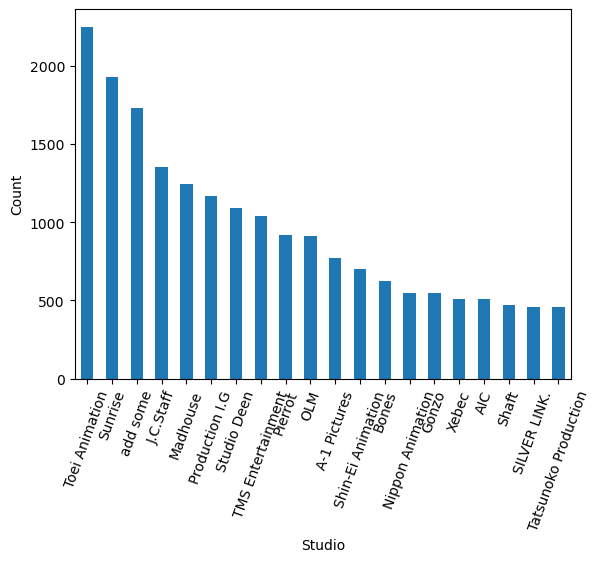

<Figure size 1600x800 with 0 Axes>

In [38]:
%matplotlib inline
# Get the top 20 studios by count
top_20_studios = super_df['Studio'].value_counts().nlargest(20)
print(top_20_studios)
# Plot the top 20 studios
top_20_studios.plot(kind='bar', xlabel='Studio', ylabel='Count', rot=70)

# Show the plot
plt.figure(figsize=(16, 8)) 
plt.show()

Studio
Pierrot Films               9.010000
Studio DURIAN               8.890000
K-Factory                   8.491818
Nippon Ramayana Film Co.    8.390000
Studio M2                   8.159474
Studio Bind                 8.146750
Sharefun Studio             8.042500
Shenman Entertainment       8.007143
Samsara Animation Studio    7.952727
Shuka                       7.930789
Name: Score, dtype: float64


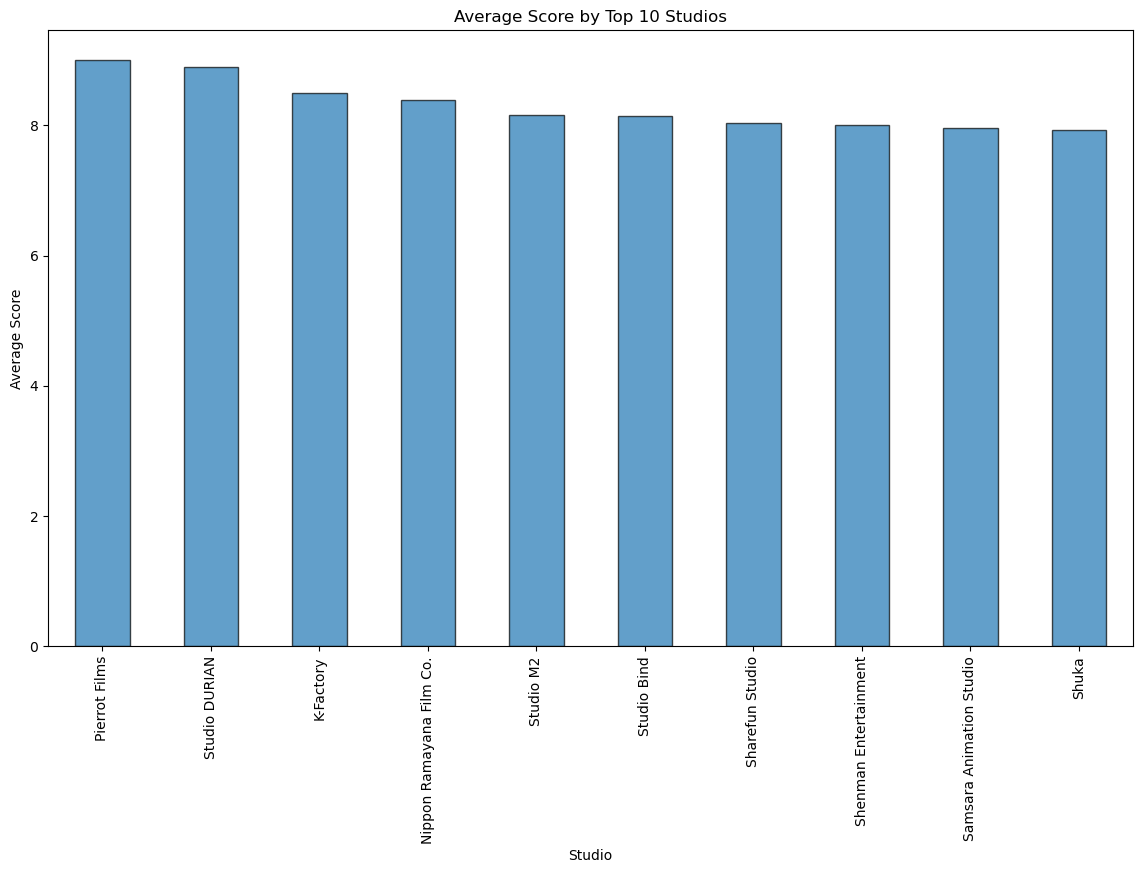

In [39]:
# Calculate the average score by studio and sort values in descending order
studio_scores = super_df.groupby('Studio')['Score'].mean().sort_values(ascending=False)

# Top rated studios based on average score
top_studios = studio_scores.head(10)
print(top_studios)

# Bar plot of average score by top 10 studios
plt.figure(figsize=(14, 8))
top_studios.plot(kind='bar', alpha=0.7, edgecolor='k')
plt.title('Average Score by Top 10 Studios')
plt.xlabel('Studio')
plt.ylabel('Average Score')
plt.show()


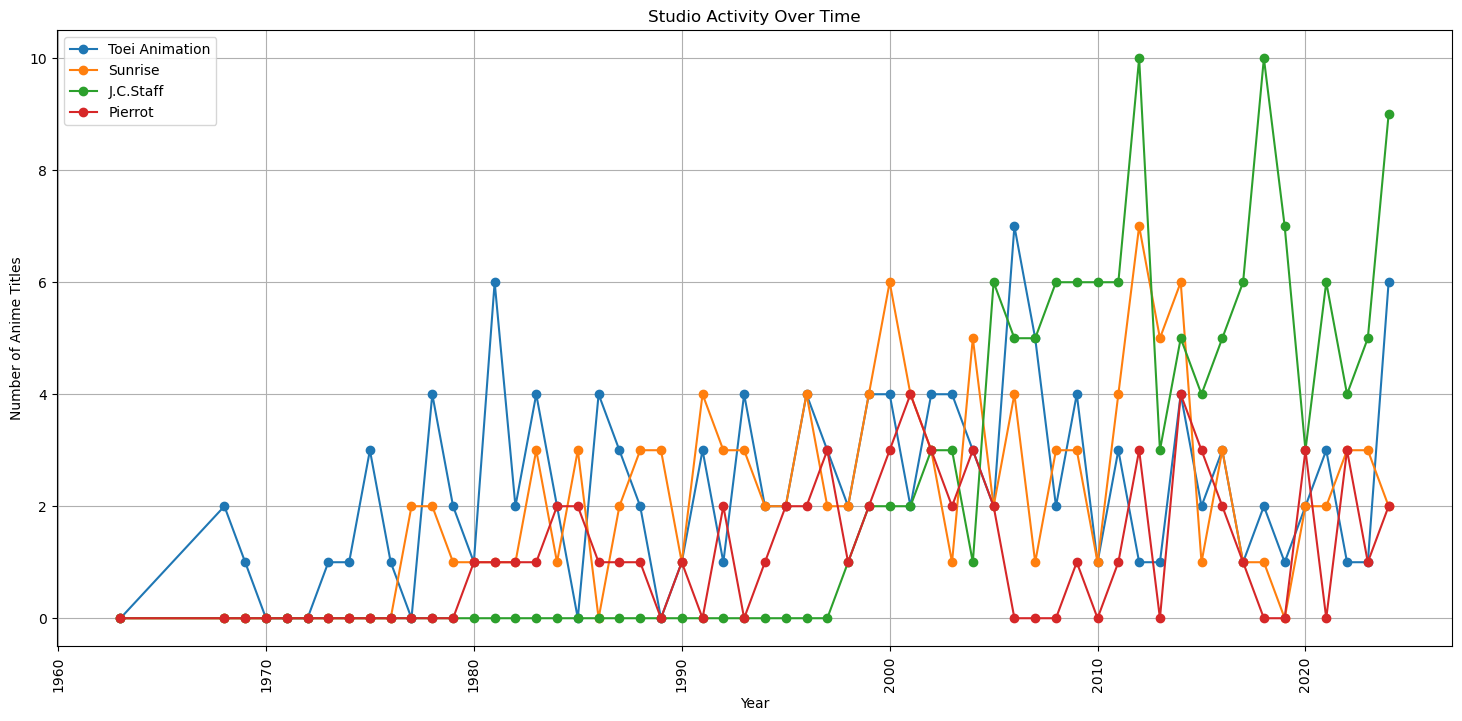

In [40]:
# Count the number of anime titles released by each studio over the years
studio_year_counts = more_plot.groupby(['Year', 'Studio']).size().unstack(fill_value=0)

# Plotting the number of anime titles released by a few selected studios over time
studios_to_plot = ['Toei Animation', 'Sunrise', 'J.C.Staff','Pierrot']  # Replace with actual studio names
plt.figure(figsize=(18, 8))

for studio in studios_to_plot:
    if studio in studio_year_counts.columns:
        plt.plot(studio_year_counts.index, studio_year_counts[studio], marker='o', label=studio)

plt.title('Studio Activity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Anime Titles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


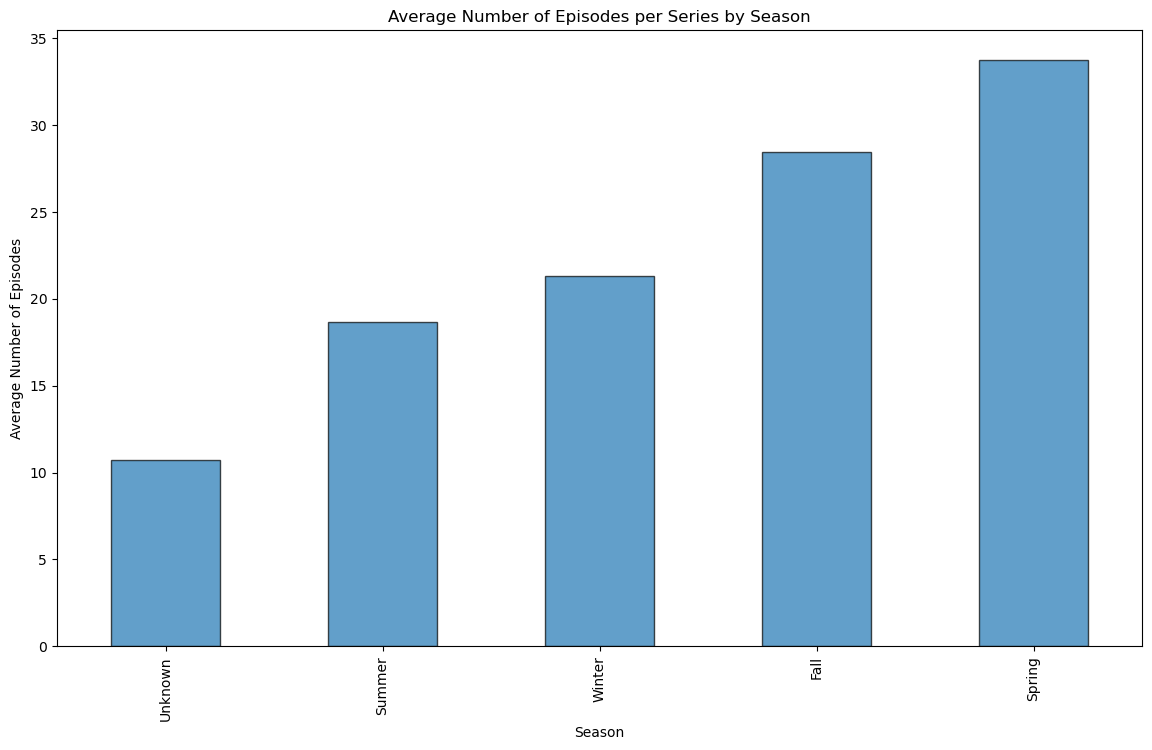

In [41]:
# Assuming there is a column 'Season' in the dataset
# Average number of episodes per series by season
episodes_per_season = super_df.groupby('Seasonal')['Episodes'].mean().sort_values()

# Bar plot of average number of episodes per series by season
plt.figure(figsize=(14, 8))
episodes_per_season.plot(kind='bar', alpha=0.7, edgecolor='k')
plt.title('Average Number of Episodes per Series by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Episodes')
plt.show()


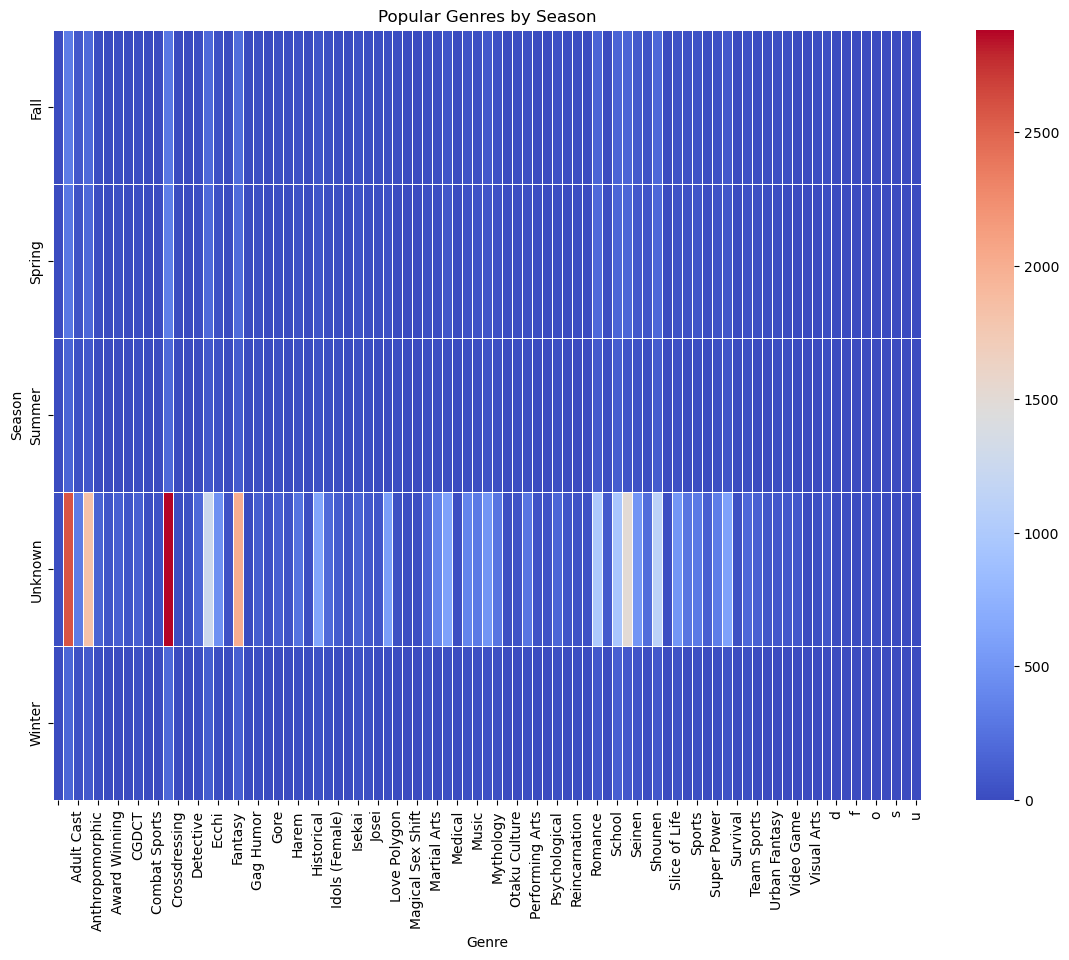

In [42]:
# Popular genres by season 
popular_genres_by_season = super_df.groupby(['Seasonal', 'Genres']).size().unstack(fill_value=0) 
# Heatmap of popular genres by season 
plt.figure(figsize=(14, 10)) 
sns.heatmap(popular_genres_by_season, cmap='coolwarm', linewidths=0.5) 
plt.title('Popular Genres by Season') 
plt.xlabel('Genre') 
plt.ylabel('Season')
plt.show()

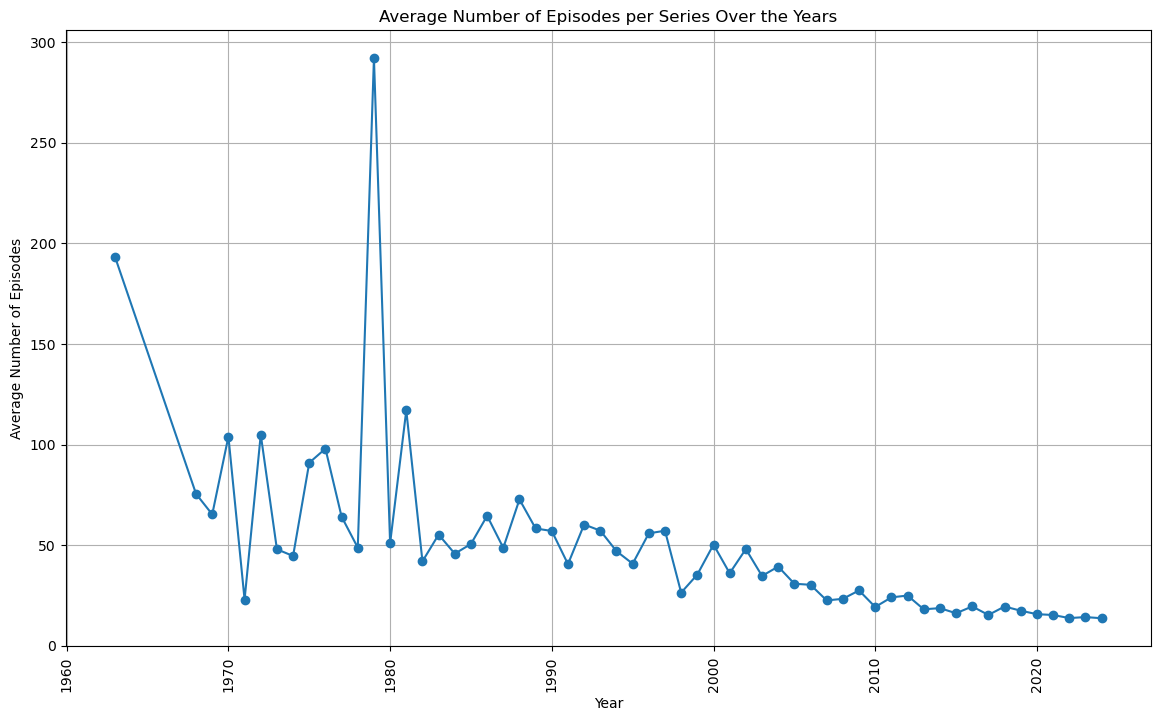

<Figure size 640x480 with 0 Axes>

In [43]:
# Number of episodes over time
episodes_per_year = more_plot.groupby('Year')['Episodes'].mean()

# Line plot of average number of episodes per series over the years
plt.figure(figsize=(14, 8))
plt.plot(episodes_per_year.index, episodes_per_year.values, marker='o', linestyle='-')
plt.title('Average Number of Episodes per Series Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Number of Episodes')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

plt.savefig('Average Number of Episodes per Series over the Years.png', format='png')

C:\Users\sylan\AppData\Local\Temp\ipykernel_2208\1741430397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_plot1['Decade'] = (more_plot1['Year'] // 10) * 10


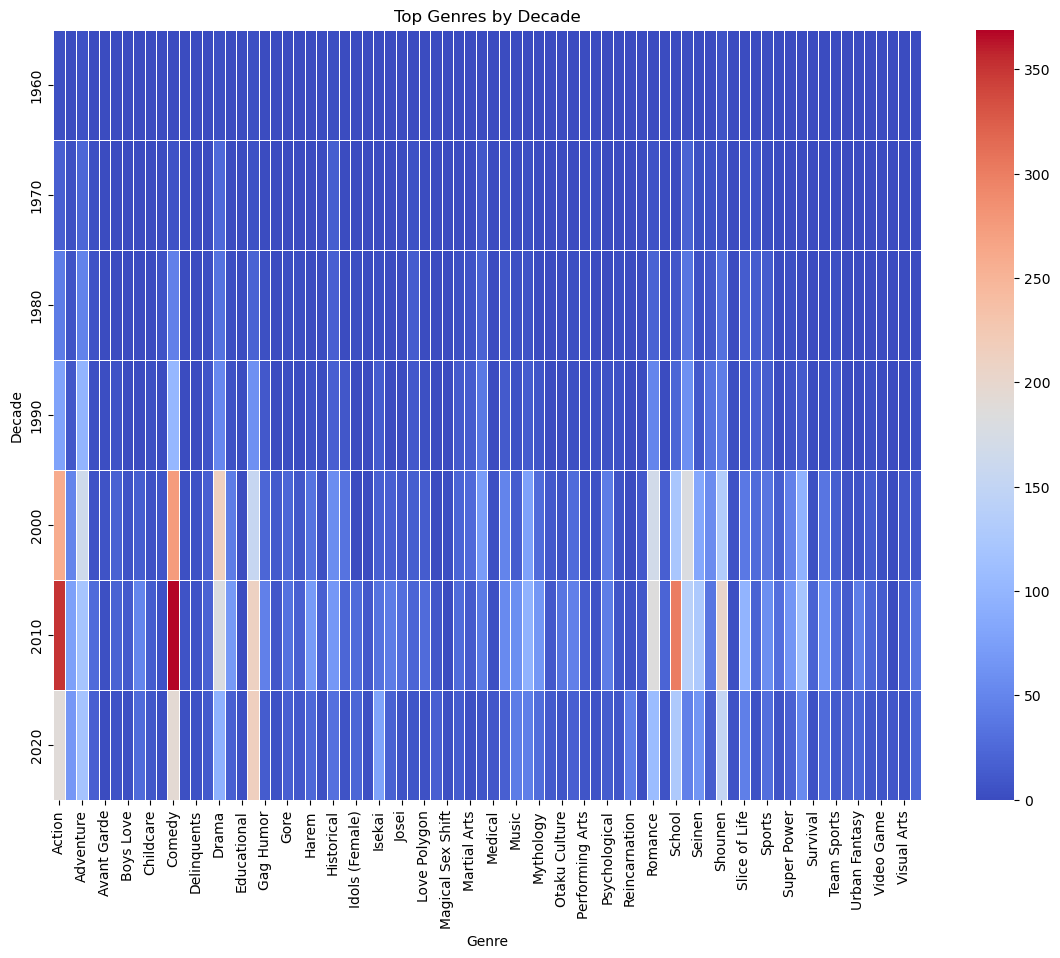

In [44]:
# Top genres by decade
more_plot1['Decade'] = (more_plot1['Year'] // 10) * 10
decade_genre_counts = more_plot1.groupby(['Decade', 'Genres']).size().unstack(fill_value=0)

# Plot of top genres by decade
plt.figure(figsize=(14, 10))
sns.heatmap(decade_genre_counts, cmap='coolwarm', linewidths=0.5)
plt.title('Top Genres by Decade')
plt.xlabel('Genre')
plt.ylabel('Decade')
plt.show()


ANOVA Table for Genres:
                 sum_sq       df         F  PR(>F)
C(Genres)    906.339205     86.0  27.51558     0.0
Residual   14459.893920  37753.0       NaN     NaN

ANOVA Table for Type:
                sum_sq       df           F         PR(>F)
C(Type)     503.380276      5.0  256.275017  2.671507e-270
Residual  14862.852850  37834.0         NaN            NaN

ANOVA Table for Season:
                   sum_sq       df           F  PR(>F)
C(Seasonal)   3222.545789      4.0  2510.04939     0.0
Residual     12143.687336  37835.0         NaN     NaN

ANOVA Table for Year:
                sum_sq       df           F  PR(>F)
C(Year)    3348.887478     58.0  181.525423     0.0
Residual  12017.345647  37781.0         NaN     NaN


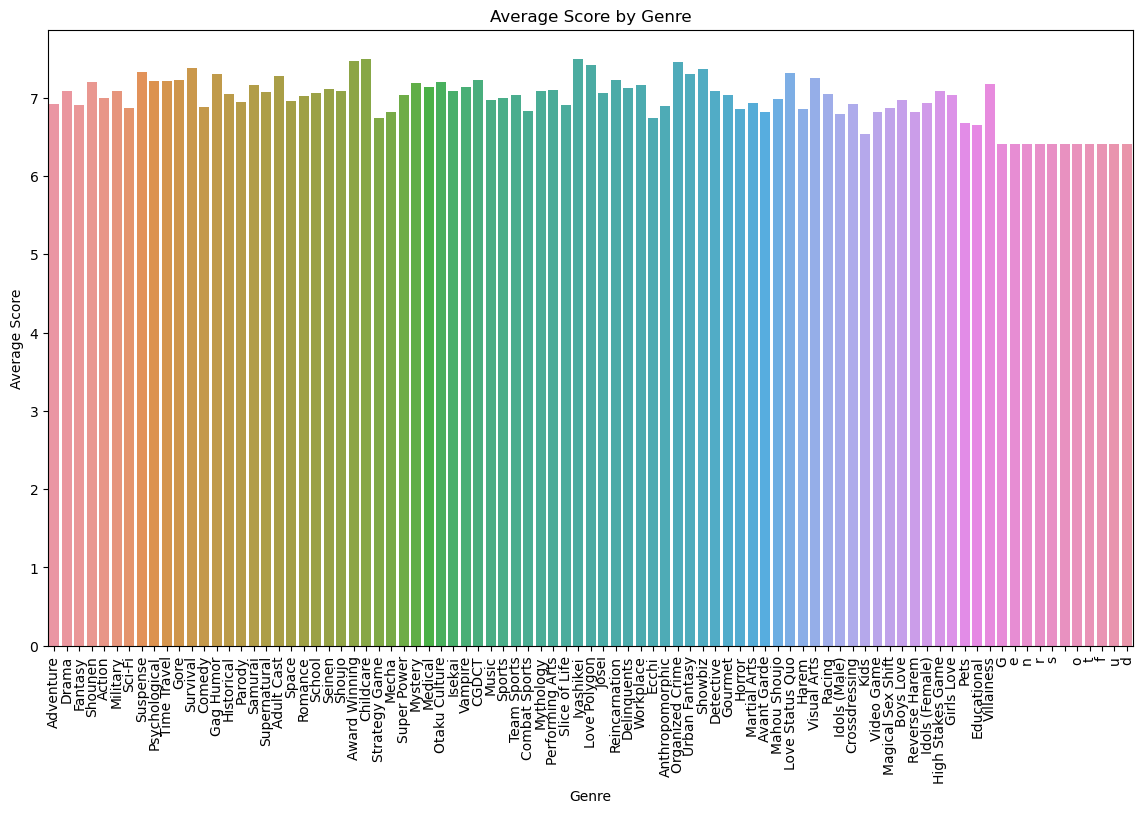

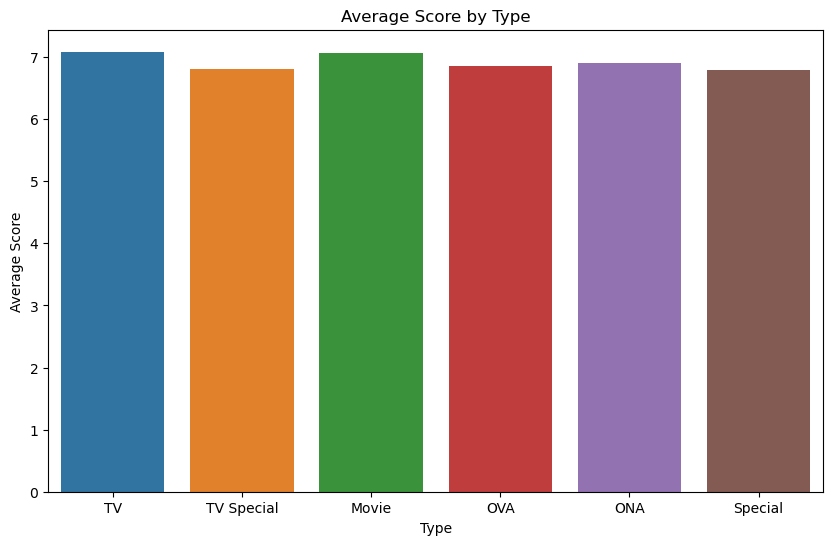

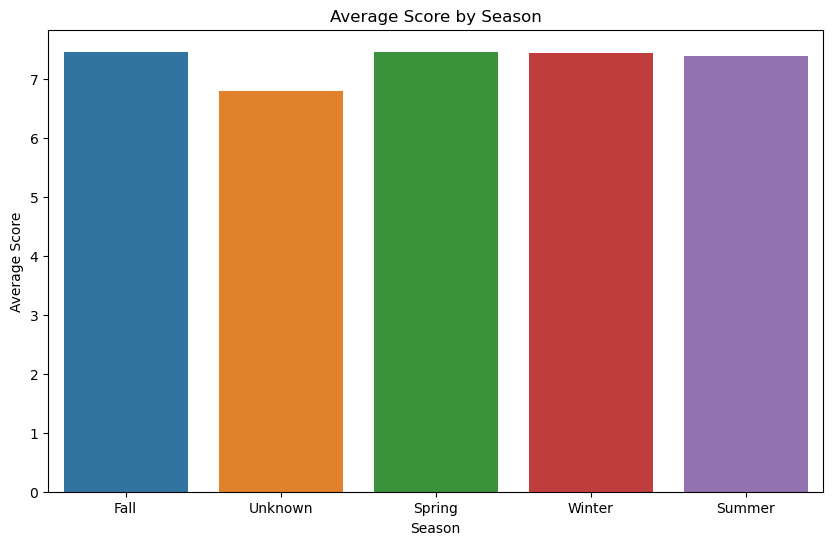

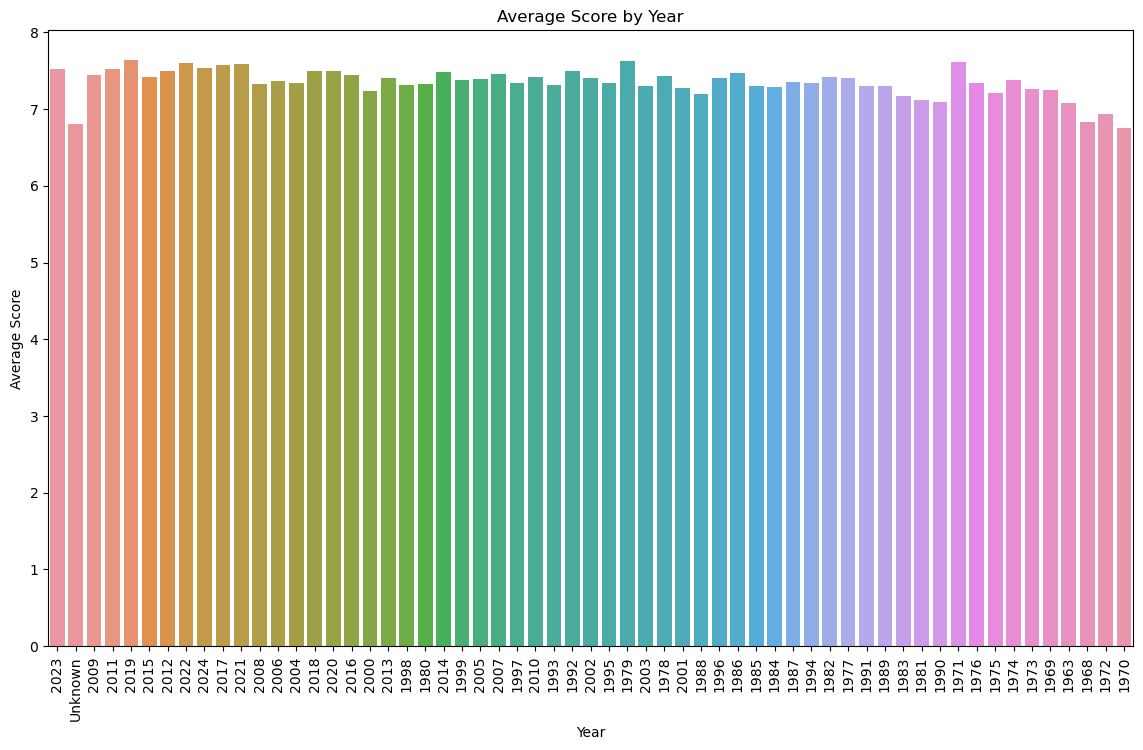

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA for Genres
model_genre = ols('Score ~ C(Genres)', data=super_df).fit()
anova_table_genre = sm.stats.anova_lm(model_genre, typ=2)
print("ANOVA Table for Genres:")
print(anova_table_genre)

# ANOVA for Type
model_type = ols('Score ~ C(Type)', data=super_df).fit()
anova_table_type = sm.stats.anova_lm(model_type, typ=2)
print("\nANOVA Table for Type:")
print(anova_table_type)

# ANOVA for Season
model_season = ols('Score ~ C(Seasonal)', data=super_df).fit()
anova_table_season = sm.stats.anova_lm(model_season, typ=2)
print("\nANOVA Table for Season:")
print(anova_table_season)

# ANOVA for Year
model_year = ols('Score ~ C(Year)', data=super_df).fit()
anova_table_year = sm.stats.anova_lm(model_year, typ=2)
print("\nANOVA Table for Year:")
print(anova_table_year)

# Visualization for Genres
plt.figure(figsize=(14, 8))
sns.barplot(x='Genres', y='Score', data=super_df, ci=None)
plt.title('Average Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.savefig('average_score_by_genre.png', format='png')
plt.show()

# Visualization for Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Score', data=super_df, ci=None)
plt.title('Average Score by Type')
plt.xlabel('Type')
plt.ylabel('Average Score')
plt.savefig('average_score_by_type.png', format='png')
plt.show()

# Visualization for Season
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasonal', y='Score', data=super_df, ci=None)
plt.title('Average Score by Season')
plt.xlabel('Season')
plt.ylabel('Average Score')
plt.savefig('average_score_by_season.png', format='png')
plt.show()

# Visualization for Year
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='Score', data=super_df, ci=None)
plt.title('Average Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.savefig('average_score_by_year.png', format='png')
plt.show()


## Summary

### Numerical variable:
- Episode has no correlation with score or ranking.

### Categorical variable:

- F-Statistics Summary:
    - Genres: 27.51558

    - Type: 256.275017

    - Season: 2510.04939

    - Year: 181.525423

- Interpretation:
    - Strongest Predictor: Season (F-statistic: 2510.04939)

        - This indicates that the season in which an anime was released is the most influential predictor of its average score among the variables tested.

    - Weakest Predictor: Genres (F-statistic: 27.51558)

        - This suggests that the genre of an anime, while still statistically significant, has the least influence on its average score compared to the other variables.